# **Shinkansen Travel Experience**

## **Context:**

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine-learning exercise aims to determine the relative importance of each parameter with regard to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who traveled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled ‘**Surveydata_train.csv**’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled ‘**Overall_Experience**’.


## **Objective:**

 The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

## **Problem Statement**

**Goal:**
The goal of the problem is to **predict whether a passenger was satisfied or not** considering his/her overall experience of traveling on the Shinkansen Bullet Train.

**Dataset:**

The problem consists of 2 separate datasets: **Travel data & Survey data. Travel data** has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

- Train_Data
- Test_Data

**Target Variable**: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The **training set** can be used to build your machine-learning model. The training set has labels for the target column - **Overall_Experience**.

The **testing set** should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘**Overall_Experience**’ level for each participant.

**Data Dictionary:**

All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

**Submission File Format:** You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

- ID
- **Overall_Experience** (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)

**Evaluation Criteria:**

**Accuracy Score:** The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.

In other words, the best possible accuracy is 100% (or 1), and the worst possible accuracy is 0%.




### **Importing Libraries and the Dataset**

In [ ]:
import pandas as pd

import numpy as np

from numpy import mean
from numpy import std

import matplotlib.pyplot as plt

import seaborn as sns

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import classification_report, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
!pip install hyperopt
!pip install catboost
!pip install lightgbm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.6 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, KBinsDiscretizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from hyperopt import fmin, tpe, hp, Trials

In [ ]:
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# !nvidia-smi

Thu Jun 27 05:24:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              23W / 300W |      2MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
t_train = pd.read_csv('/content/drive/MyDrive/Colab/Shinkansen Travel Experience/Traveldata_train_(2).csv')
s_train = pd.read_csv('/content/drive/MyDrive/Colab/Shinkansen Travel Experience/Surveydata_train_(2).csv')
t_test = pd.read_csv('/content/drive/MyDrive/Colab/Shinkansen Travel Experience/Traveldata_test_(2).csv')
s_test = pd.read_csv('/content/drive/MyDrive/Colab/Shinkansen Travel Experience/Surveydata_test_(2).csv')

### **Understanding the data**

In [ ]:
df_list=[t_train, s_train, t_test, s_test]

In [ ]:
from IPython.display import display
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

In [ ]:
for i in df_list:
    display(i.head(5))

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
for i in df_list:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID              

In [ ]:
for i in df_list:
    print(i.nunique())

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64
ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64
ID                         35602
Gender                         2
Customer_Type                  2
Age              

### **Data Preprocessing**



*   Data Merging
*   Checking for missing values
*   Checking for duplicate values



In [ ]:
# Merging Training Data
df_train = pd.merge(t_train, s_train, how = 'left', on ='ID')
df_train.shape

(94379, 25)

In [ ]:
# Check if there are duplicate entries
df_train.duplicated().sum()

0

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [ ]:
df_train.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
# MERGE Test data
df_test = pd.merge(t_test,s_test, how = 'left', on ='ID')
df_test.shape

(35602, 24)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
df_test.isnull().sum()

ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

In [ ]:
# Check if there are duplicate entries
df_test.duplicated().sum()

0

In [ ]:
df_test[df_test['ID'].isin(df_train['ID'])]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [ ]:
df_train[df_train['ID'].isin(df_test['ID'])]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [ ]:
df = pd.concat([df_train, df_test], axis=0)

In [ ]:
df = df.set_index('ID')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129981 entries, 98800001 to 99935602
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   129874 non-null  object 
 1   Customer_Type            117647 non-null  object 
 2   Age                      129937 non-null  float64
 3   Type_Travel              117307 non-null  object 
 4   Travel_Class             129981 non-null  object 
 5   Travel_Distance          129981 non-null  int64  
 6   Departure_Delay_in_Mins  129895 non-null  float64
 7   Arrival_Delay_in_Mins    129501 non-null  float64
 8   Overall_Experience       94379 non-null   float64
 9   Seat_Comfort             129898 non-null  object 
 10  Seat_Class               129981 non-null  object 
 11  Arrival_Time_Convenient  117726 non-null  object 
 12  Catering                 117883 non-null  object 
 13  Platform_Location        129939 non-null  object 
 14  

In [ ]:
df.isnull().sum()

Gender                       107
Customer_Type              12334
Age                           44
Type_Travel                12674
Travel_Class                   0
Travel_Distance                0
Departure_Delay_in_Mins       86
Arrival_Delay_in_Mins        480
Overall_Experience         35602
Seat_Comfort                  83
Seat_Class                     0
Arrival_Time_Convenient    12255
Catering                   12098
Platform_Location             42
Onboard_Wifi_Service          42
Onboard_Entertainment         26
Online_Support               117
Ease_of_Online_Booking        91
Onboard_Service            10473
Legroom                      115
Baggage_Handling             182
CheckIn_Service               99
Cleanliness                    8
Online_Boarding                8
dtype: int64

In [ ]:
df_backup = df.copy(deep=True)

### **Data Imputation**

In [ ]:
#df = df_backup.copy(deep=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129981 entries, 98800001 to 99935602
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   129874 non-null  object 
 1   Customer_Type            117647 non-null  object 
 2   Age                      129937 non-null  float64
 3   Type_Travel              117307 non-null  object 
 4   Travel_Class             129981 non-null  object 
 5   Travel_Distance          129981 non-null  int64  
 6   Departure_Delay_in_Mins  129895 non-null  float64
 7   Arrival_Delay_in_Mins    129501 non-null  float64
 8   Overall_Experience       94379 non-null   float64
 9   Seat_Comfort             129898 non-null  object 
 10  Seat_Class               129981 non-null  object 
 11  Arrival_Time_Convenient  117726 non-null  object 
 12  Catering                 117883 non-null  object 
 13  Platform_Location        129939 non-null  object 
 14  

In [ ]:
num_cols = df.select_dtypes(include='number').columns

In [ ]:
num_cols

Index(['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'Overall_Experience'], dtype='object')

In [ ]:
cat_cols = df.select_dtypes(include='object').columns

In [ ]:
cat_cols

Index(['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding'], dtype='object')

In [ ]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129937.0,39.427138,15.122312,7.0,27.0,40.0,51.0,85.0
Travel_Distance,129981.0,1981.151591,1026.964654,50.0,1359.0,1924.0,2543.0,6951.0
Departure_Delay_in_Mins,129895.0,14.711067,38.072295,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,129501.0,15.088393,38.464694,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


In [ ]:
# # use departure delay to fill null arrival delay
# df.Arrival_Delay_in_Mins.fillna(df.Departure_Delay_in_Mins, inplace=True)

In [ ]:
df.Arrival_Delay_in_Mins.fillna(0, inplace=True)
df.Departure_Delay_in_Mins.fillna(0, inplace=True)

In [ ]:
# # Replace Missing values with mode for Columns with Little number of Missing Values
# clean_columns = ['Gender', 'Age', 'Seat_Comfort', 'Platform_Location',
#                  'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
#                  'Ease_of_Online_Booking', 'Legroom', 'Baggage_Handling',
#                  'CheckIn_Service', 'Cleanliness', 'Online_Boarding']
# for col in clean_columns:
#     mode_value = df[col].mode()[0]
#     df[col].fillna(mode_value, inplace=True)

In [ ]:
# Loop through the categorical columns
# for col in cat_cols:
#     print(f"Column: {col}")
#     value_counts = df[col].value_counts()
#     print(f"Unique Value Distribution:\n{value_counts}\n")

In [ ]:
# Replace Missing values with mode for Columns with More number of Missing Values
#clean_columns2 = ['Customer_Type', 'Type_Travel', 'Arrival_Time_Convenient', 'Catering',
#                 'Onboard_Service']
#for col in clean_columns2:
#    df[col].fillna('Unknown', inplace=True)

In [ ]:
df.isnull().sum()

Gender                       107
Customer_Type              12334
Age                           44
Type_Travel                12674
Travel_Class                   0
Travel_Distance                0
Departure_Delay_in_Mins        0
Arrival_Delay_in_Mins          0
Overall_Experience         35602
Seat_Comfort                  83
Seat_Class                     0
Arrival_Time_Convenient    12255
Catering                   12098
Platform_Location             42
Onboard_Wifi_Service          42
Onboard_Entertainment         26
Online_Support               117
Ease_of_Online_Booking        91
Onboard_Service            10473
Legroom                      115
Baggage_Handling             182
CheckIn_Service               99
Cleanliness                    8
Online_Boarding                8
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129981 entries, 98800001 to 99935602
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   129874 non-null  object 
 1   Customer_Type            117647 non-null  object 
 2   Age                      129937 non-null  float64
 3   Type_Travel              117307 non-null  object 
 4   Travel_Class             129981 non-null  object 
 5   Travel_Distance          129981 non-null  int64  
 6   Departure_Delay_in_Mins  129981 non-null  float64
 7   Arrival_Delay_in_Mins    129981 non-null  float64
 8   Overall_Experience       94379 non-null   float64
 9   Seat_Comfort             129898 non-null  object 
 10  Seat_Class               129981 non-null  object 
 11  Arrival_Time_Convenient  117726 non-null  object 
 12  Catering                 117883 non-null  object 
 13  Platform_Location        129939 non-null  object 
 14  

## EDA

Age
Skew : -0.0


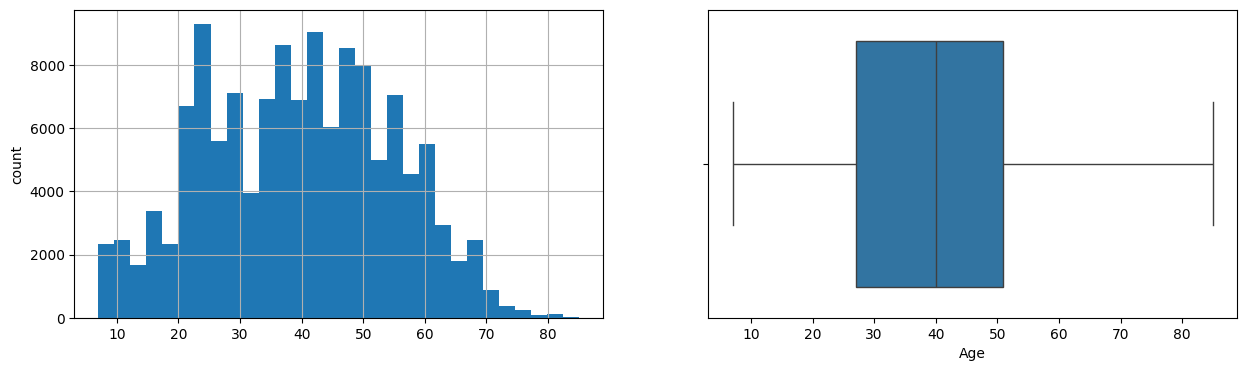

Travel_Distance
Skew : 0.47


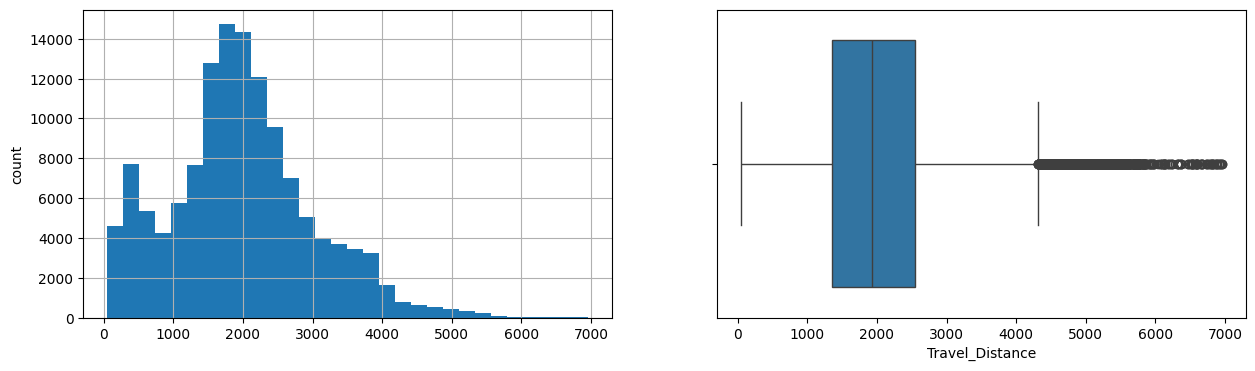

Departure_Delay_in_Mins
Skew : 6.82


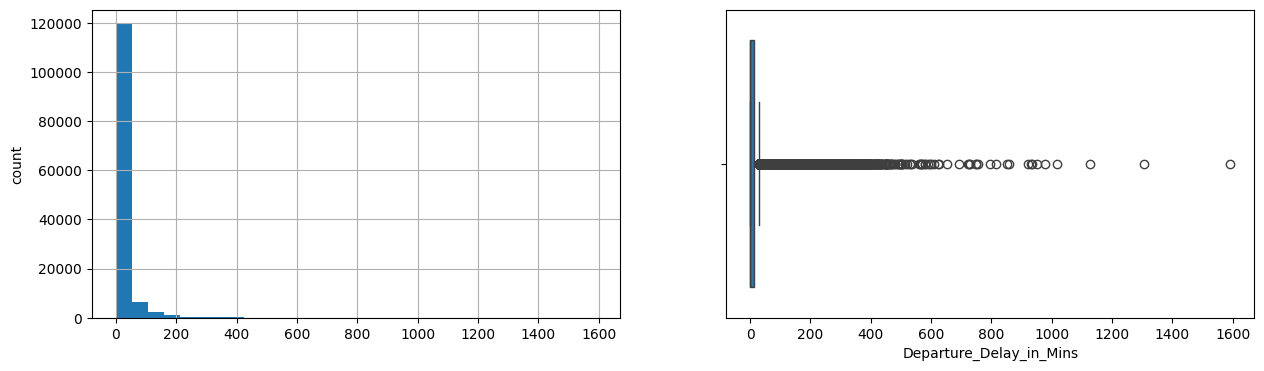

Arrival_Delay_in_Mins
Skew : 6.68


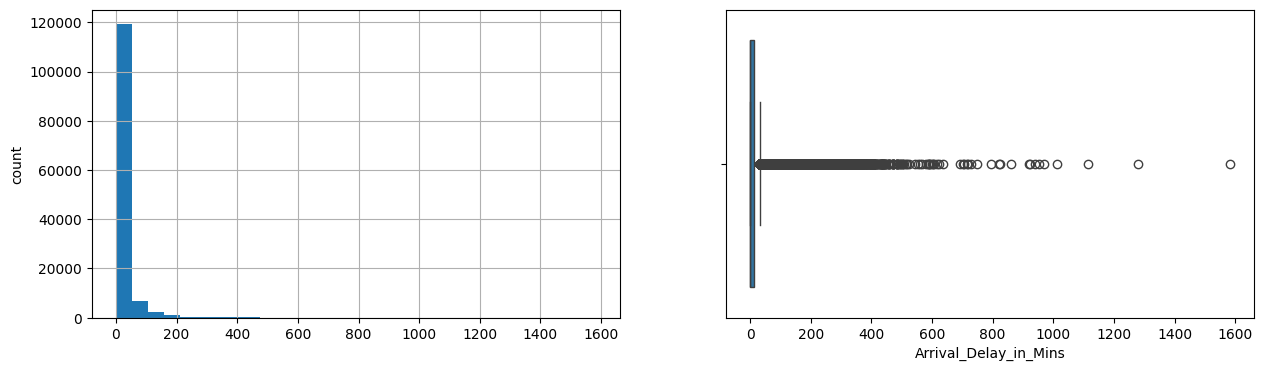

Overall_Experience
Skew : -0.19


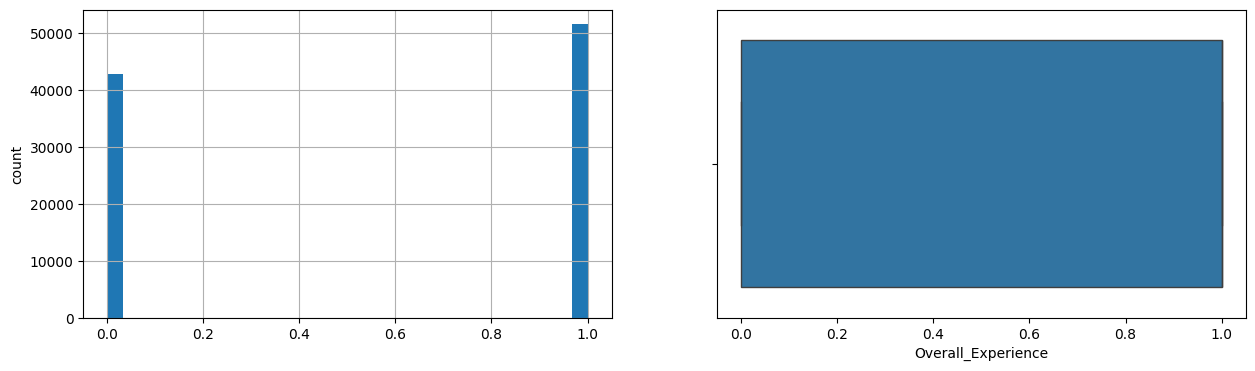

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data = df)
    plt.show()

In [ ]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129937.0,39.427138,15.122312,7.0,27.0,40.0,51.0,85.0
Travel_Distance,129981.0,1981.151591,1026.964654,50.0,1359.0,1924.0,2543.0,6951.0
Departure_Delay_in_Mins,129981.0,14.701333,38.061578,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,129981.0,15.032674,38.404512,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


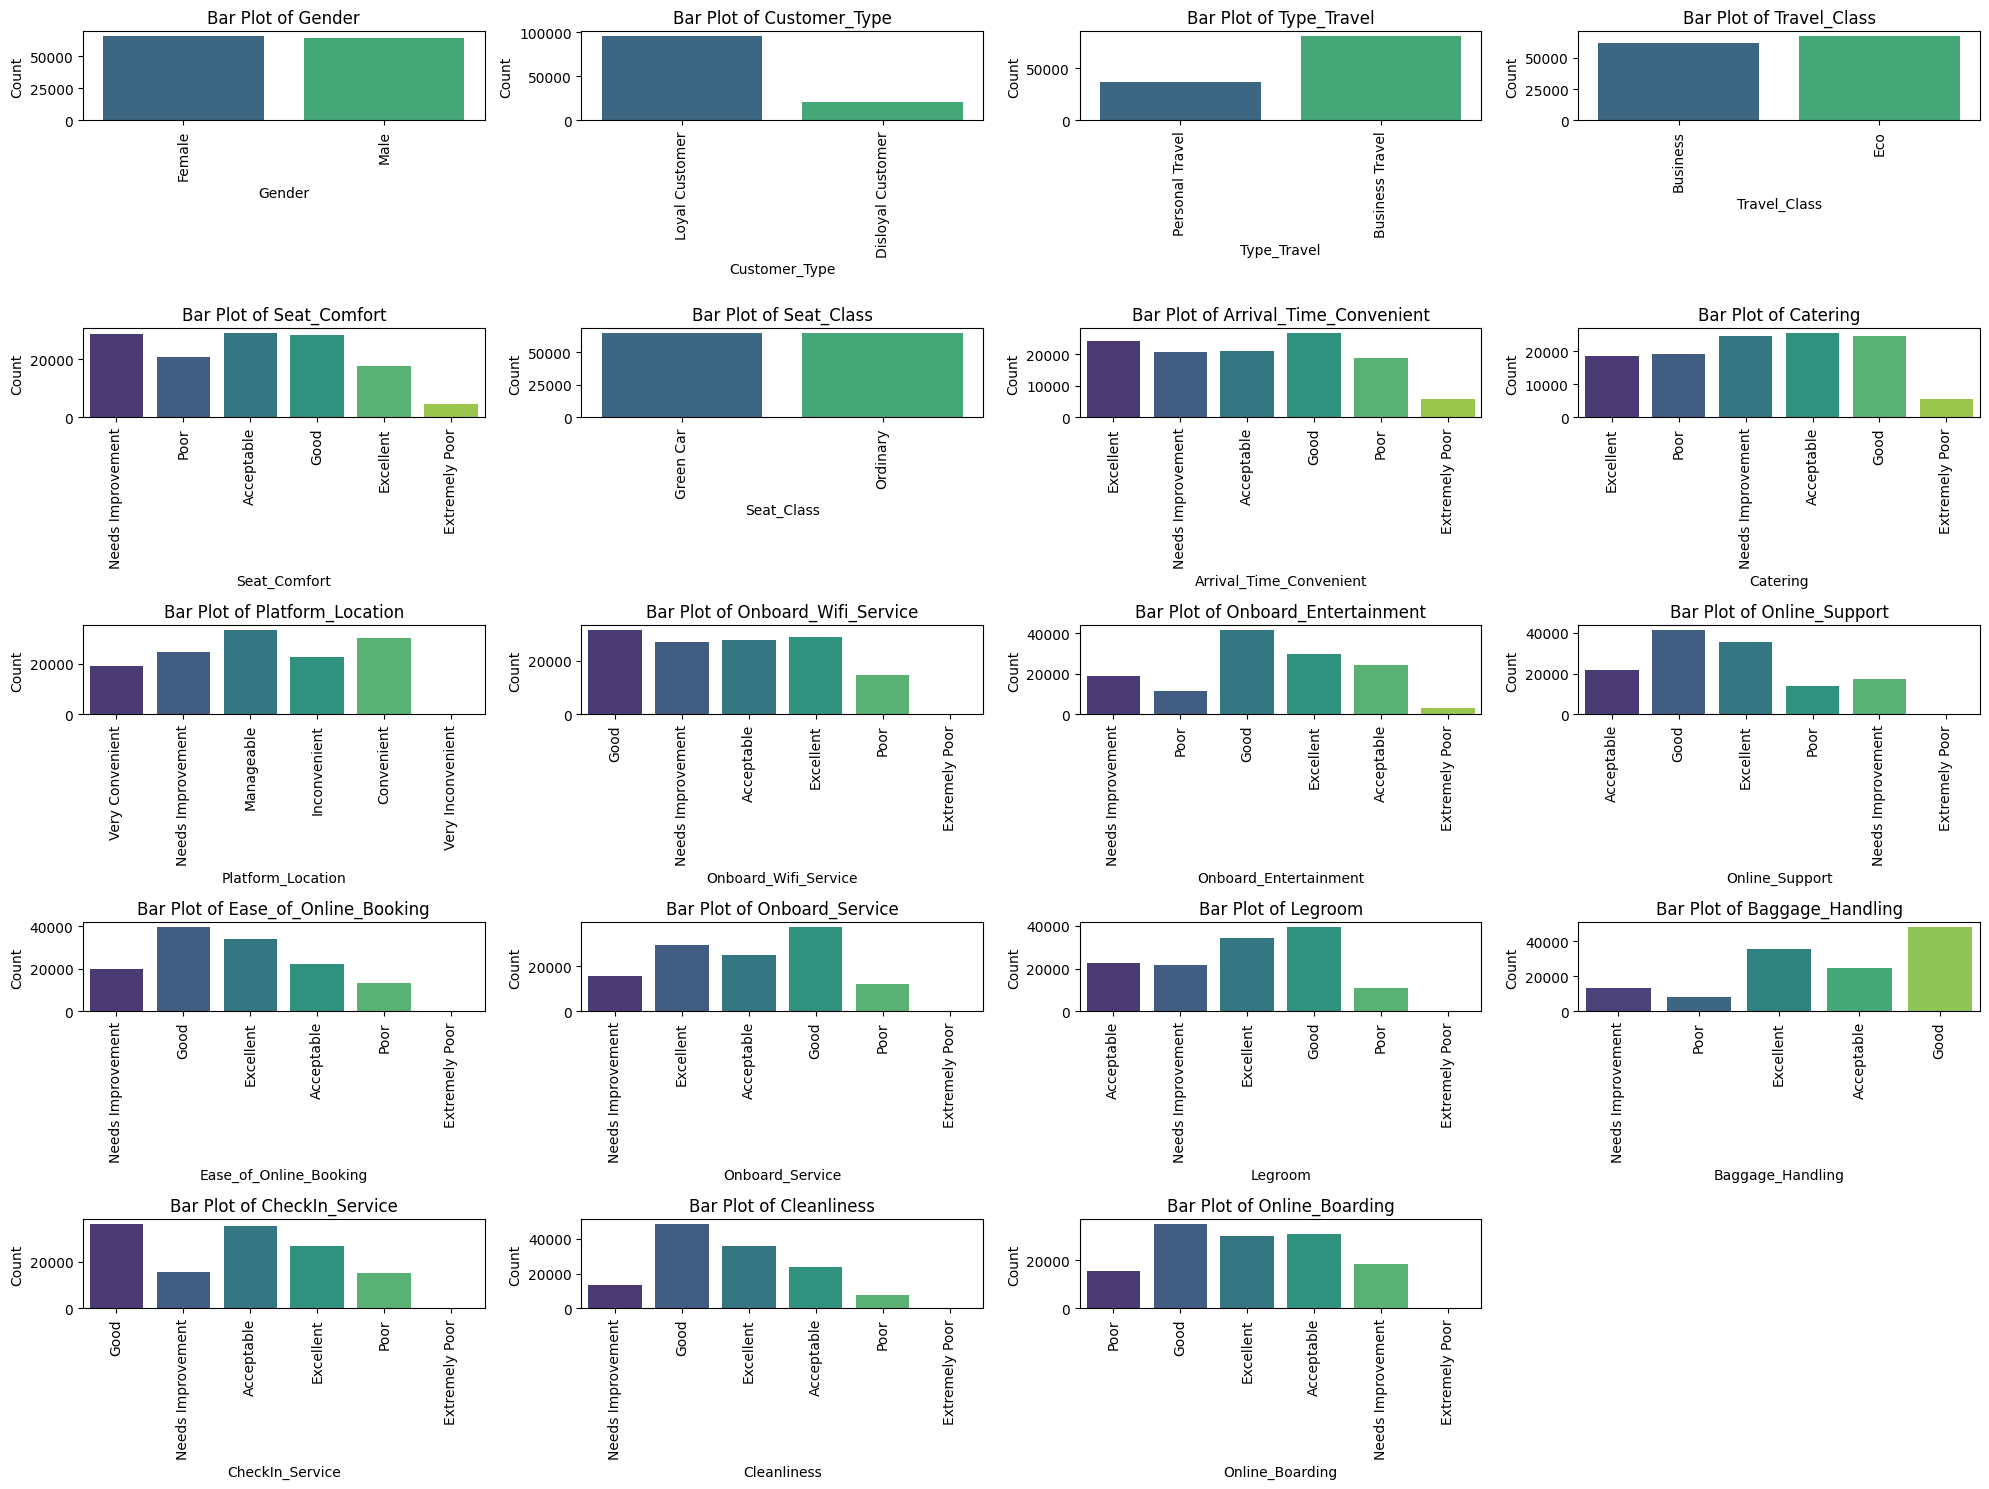

In [ ]:
# Number of columns to be plotted
num_of_cat_cols = len(cat_cols)

# Determine the number of rows and columns for the subplots
n_cols = 4  # Number of columns in the grid
n_rows = (num_of_cat_cols // n_cols) + (num_of_cat_cols % n_cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Loop through the categorical columns and create a bar plot for each
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Bar Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Encoding Categorical Values.
df = df.replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'],
           [6, 5, 4, 3, 2, 1])
df = df.replace(['Male', 'Female'], [1,0])
df = df.replace(['Loyal Customer', 'Disloyal Customer'], [1,0])
df = df.replace(['Business Travel', 'Personal Travel'], [1,0])
df = df.replace(['Business', 'Eco'], [1,0])
df = df.replace(['Green Car', 'Ordinary'], [1,0])
df = df.replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'],
           [6, 5, 4, 3, 2, 1])

In [ ]:
# Columns to exclude
exclude_cols = pd.Index(['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Class'])

# Define new Index excluding specified columns
cat_6_rating_cols = cat_cols.difference(exclude_cols)

print(cat_6_rating_cols)

Index(['Arrival_Time_Convenient', 'Baggage_Handling', 'Catering', 'CheckIn_Service', 'Cleanliness', 'Ease_of_Online_Booking', 'Legroom', 'Onboard_Entertainment', 'Onboard_Service', 'Onboard_Wifi_Service', 'Online_Boarding', 'Online_Support', 'Platform_Location', 'Seat_Comfort'], dtype='object')


In [ ]:
# Function to perform the cumulative distribution-based transformation
def transform_column(df, column):
    value_counts = df[column].value_counts(normalize=True)
    cumulative_distribution = value_counts.sort_index().cumsum()
    rating_dict = cumulative_distribution * 6
    return df[column].map(rating_dict)

# Loop through each column in cat_6_rating_cols and transform it
for col in cat_6_rating_cols:
    transformed_col = transform_column(df, col)
    df[col + '_rating'] = transformed_col

In [ ]:
df

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Arrival_Time_Convenient_rating,Baggage_Handling_rating,Catering_rating,CheckIn_Service_rating,Cleanliness_rating,Ease_of_Online_Booking_rating,Legroom_rating,Onboard_Entertainment_rating,Onboard_Service_rating,Onboard_Wifi_Service_rating,Online_Boarding_rating,Online_Support_rating,Platform_Location_rating,Seat_Comfort_rating
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
98800001,0.0,1.0,52.0,NaN,1,272,0.0,5.0,0.0,3.0,1,6.0,6.0,6.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0,6.000000,0.988390,6.000000,4.751975,0.978157,1.543444,2.577395,1.569312,1.404107,4.668160,0.710224,2.439568,6.000000,2.517775
98800002,1.0,1.0,48.0,0.0,0,2200,9.0,0.0,0.0,2.0,0,6.0,2.0,3.0,5.0,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0,6.000000,0.368138,1.244607,1.424632,4.340286,4.423712,1.539572,0.682621,6.000000,4.668160,4.615466,4.357097,2.175790,1.188563
98800003,0.0,1.0,43.0,1.0,1,1061,77.0,119.0,1.0,3.0,1,3.0,3.0,3.0,3.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,2.318791,6.000000,2.500717,4.751975,6.000000,6.000000,6.000000,4.621923,6.000000,1.934985,6.000000,6.000000,2.175790,2.517775
98800004,0.0,1.0,44.0,1.0,1,780,13.0,18.0,0.0,4.0,0,3.0,NaN,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,2.318791,2.118599,NaN,4.751975,2.085295,2.579044,2.577395,1.569312,2.651270,3.210029,2.989913,2.439568,2.175790,3.864725
98800005,0.0,1.0,50.0,1.0,1,1981,0.0,0.0,1.0,4.0,0,4.0,4.0,4.0,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.390143,4.348277,3.803755,4.751975,4.340286,4.423712,4.412148,4.621923,4.533337,1.934985,4.615466,6.000000,3.724378,3.864725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935598,1.0,1.0,8.0,0.0,0,1334,0.0,0.0,NaN,3.0,1,6.0,3.0,4.0,4.0,3.0,4.0,4.0,5.0,6.0,5.0,4.0,5.0,4.0,6.000000,4.348277,2.500717,3.066568,4.340286,2.579044,6.000000,1.569312,4.533337,3.210029,2.989913,2.439568,3.724378,2.517775
99935599,0.0,1.0,53.0,1.0,1,1772,0.0,0.0,NaN,3.0,0,3.0,5.0,3.0,4.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.318791,4.348277,5.059406,3.066568,4.340286,4.423712,4.412148,6.000000,4.533337,3.210029,4.615466,6.000000,2.175790,2.517775
99935600,1.0,0.0,22.0,1.0,0,1180,0.0,0.0,NaN,5.0,1,1.0,5.0,3.0,3.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,3.0,0.305795,0.368138,5.059406,0.709521,6.000000,1.543444,2.577395,4.621923,0.612110,1.934985,1.568172,0.643827,2.175790,5.176662


In [ ]:
df.drop(columns=cat_6_rating_cols, inplace=True)

In [ ]:
# # Define the ordered responses
# ordered_responses = [1, 2, 3, 4, 5, 6]

# # Step 1: Calculate Distribution of Responses
# frequency = df['Seat_Comfort'].value_counts(normalize=True).reindex(ordered_responses)
# print("Frequency:\n", frequency)

# # Step 2: Determine Cumulative Distribution
# cumulative_distribution = frequency.cumsum()
# print("Cumulative Distribution:\n", cumulative_distribution)

# # Step 3: Assign Ratings Based on Cumulative Percentiles
# # Map each response category to its cumulative distribution value
# ratings = {response: cumulative_distribution[response] * 6 for response in cumulative_distribution.index}
# print("Ratings Mapping:\n", ratings)


In [ ]:
# mean_age = df['Age'].mean()
# df['Age'].fillna(mean_age, inplace=True)

In [ ]:
# Separate the 'Overall_Experience' column
overall_experience = df['Overall_Experience']
df_without_overall_experience = df.drop(columns=['Overall_Experience'])

# Initialize the IterativeImputer
imputer = IterativeImputer(estimator=BayesianRidge(), random_state=0)

# Fit the imputer on the dataset and transform it
imputed_data = imputer.fit_transform(df_without_overall_experience)

# Convert the imputed data back to a DataFrame and set the index
df_imputed = pd.DataFrame(imputed_data, columns=df_without_overall_experience.columns, index=df_without_overall_experience.index)

# Concatenate the imputed data with the 'Overall_Experience' column
df_final = pd.concat([df_imputed, overall_experience], axis=1)


In [ ]:
# # Convert imputed categorical columns back to integers
# for col in cat_cols:
#     df_final[col] = df_final[col].round().astype(int)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129981 entries, 98800001 to 99935602
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Gender                          129981 non-null  float64
 1   Customer_Type                   129981 non-null  float64
 2   Age                             129981 non-null  float64
 3   Type_Travel                     129981 non-null  float64
 4   Travel_Class                    129981 non-null  float64
 5   Travel_Distance                 129981 non-null  float64
 6   Departure_Delay_in_Mins         129981 non-null  float64
 7   Arrival_Delay_in_Mins           129981 non-null  float64
 8   Seat_Class                      129981 non-null  float64
 9   Arrival_Time_Convenient_rating  129981 non-null  float64
 10  Baggage_Handling_rating         129981 non-null  float64
 11  Catering_rating                 129981 non-null  float64
 12  CheckIn_Serv

In [ ]:
df_backup2 = df.copy(deep=True)
df = df_final.copy(deep=True)

In [ ]:
#create a new column -> total_delay
df['Total_Delay'] = (df['Departure_Delay_in_Mins']+ df['Arrival_Delay_in_Mins'])

# #create a new vari  able : over_all rating -> total 14 columns so dividing by 14 to keep the rating scale same
# df['Overall_Rating'] = round((df['Onboard_Wifi_Service']+ df['Arrival_Time_Convenient'] +
# df['Ease_of_Online_Booking'] + df['Platform_Location'] + df['Catering']+ df['Online_Support'] + df['Ease_of_Online_Booking'] +
# df['Seat_Comfort'] + df['Onboard_Entertainment'] + df['Online_Boarding'] + df['Legroom'] +
# df['Baggage_Handling'] + df['CheckIn_Service'] + df['Onboard_Service'] + df['Cleanliness'])/14,1)



In [ ]:
# Calculate the Overall_Rating using the new rating columns
df['Overall_Rating'] = round((
    df['Onboard_Wifi_Service_rating'] +
    df['Arrival_Time_Convenient_rating'] +
    df['Ease_of_Online_Booking_rating'] +
    df['Platform_Location_rating'] +
    df['Catering_rating'] +
    df['Online_Support_rating'] +
    df['Seat_Comfort_rating'] +
    df['Onboard_Entertainment_rating'] +
    df['Online_Boarding_rating'] +
    df['Legroom_rating'] +
    df['Baggage_Handling_rating'] +
    df['CheckIn_Service_rating'] +
    df['Onboard_Service_rating'] +
    df['Cleanliness_rating']
) / 14, 1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129981 entries, 98800001 to 99935602
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Gender                          129981 non-null  float64
 1   Customer_Type                   129981 non-null  float64
 2   Age                             129981 non-null  float64
 3   Type_Travel                     129981 non-null  float64
 4   Travel_Class                    129981 non-null  float64
 5   Travel_Distance                 129981 non-null  float64
 6   Departure_Delay_in_Mins         129981 non-null  float64
 7   Arrival_Delay_in_Mins           129981 non-null  float64
 8   Seat_Class                      129981 non-null  float64
 9   Arrival_Time_Convenient_rating  129981 non-null  float64
 10  Baggage_Handling_rating         129981 non-null  float64
 11  Catering_rating                 129981 non-null  float64
 12  CheckIn_Serv

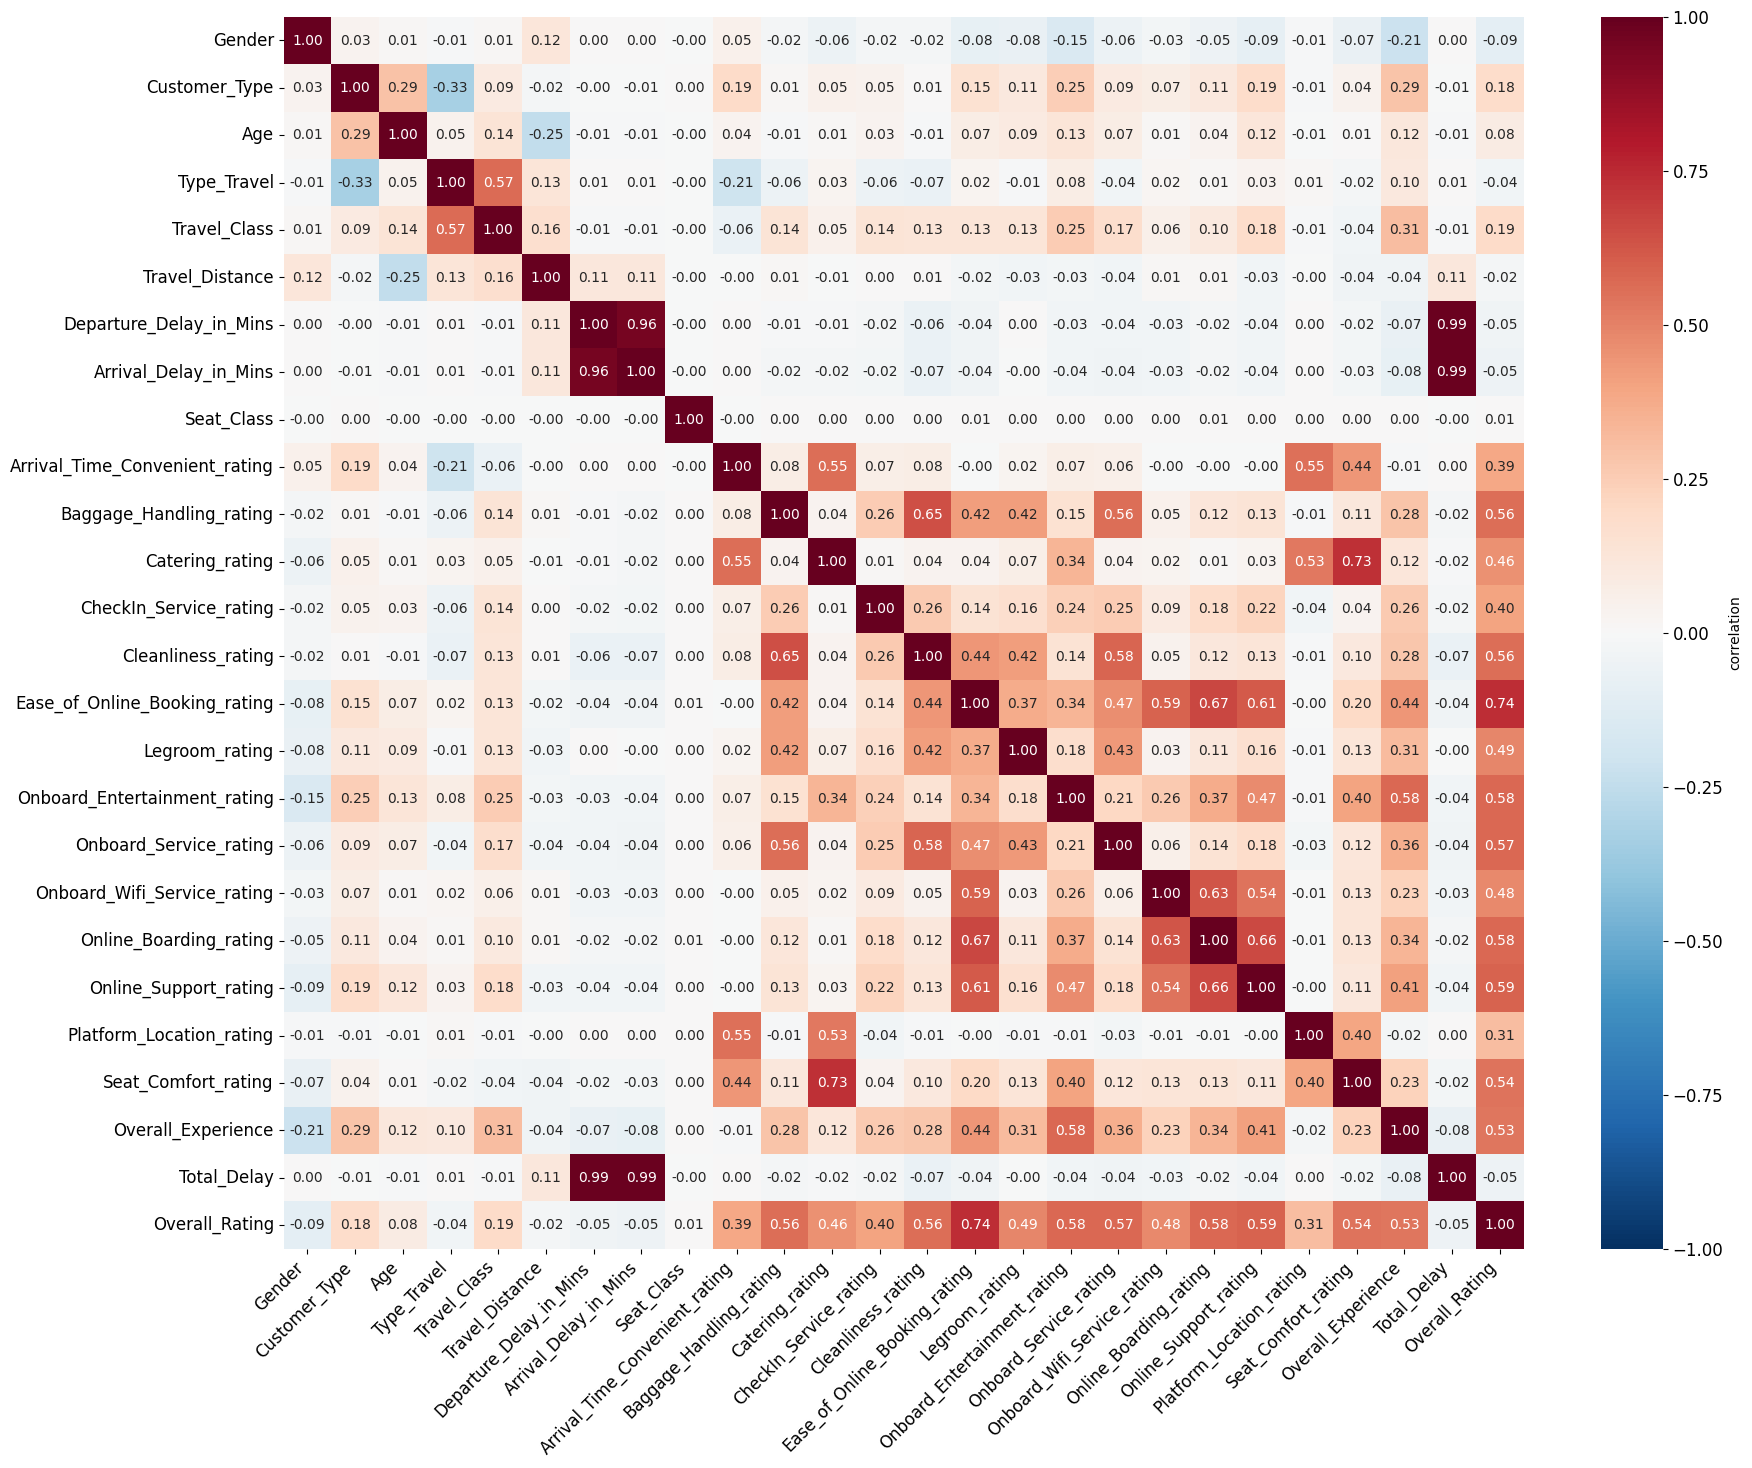

In [ ]:
#Correlation for numerical_columns
df_corr = df.corr()

# Plot correlations as a heatmap

fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(df_corr, vmin=-1, vmax=1, cmap='RdBu_r',
            xticklabels=True, yticklabels=True, annot=True, fmt='.2f',
            annot_kws={'size': 10}, cbar_kws={'label': 'correlation'}, ax=ax)

# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adjust the font size of the color bar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.show()

In [ ]:
# df = df_backup3.copy(deep=True)

In [ ]:
# # List of categorical columns
# PCA_cols = ['Overall_Rating','Onboard_Wifi_Service_rating','Arrival_Time_Convenient_rating','Ease_of_Online_Booking_rating','Platform_Location_rating',
#     'Catering_rating', 'Online_Support_rating','Seat_Comfort_rating','Onboard_Entertainment_rating','Online_Boarding_rating','Legroom_rating',
#     'Baggage_Handling_rating','CheckIn_Service_rating','Onboard_Service_rating','Cleanliness_rating']

# # Extract the features (categorical fields) and target
# X_cat = df[PCA_cols]

# # Standardize the features
# scaler = StandardScaler()
# X_cat_scaled = scaler.fit_transform(X_cat)

# # Apply PCA
# pca = PCA(n_components=13)
# X_cat_pca = pca.fit_transform(X_cat_scaled)
# print("Explained variance ratio:", pca.explained_variance_ratio_)
# print("Total explained variance:", np.sum(pca.explained_variance_ratio_))

# X_cat_pca_df = pd.DataFrame(X_cat_pca, columns=[f'PC{i+1}' for i in range(X_cat_pca.shape[1])], index=df.index)

# df_with_pca = df.join(X_cat_pca_df)

Explained variance ratio: [0.33002449 0.17316904 0.14012119 0.06690703 0.05946211 0.04288703
 0.03366162 0.02970481 0.0285545  0.02346694 0.02322065 0.02026285
 0.01579414]
Total explained variance: 0.987236392010198


In [ ]:
# df_with_pca_dropped = df_with_pca.drop(columns=PCA_cols)

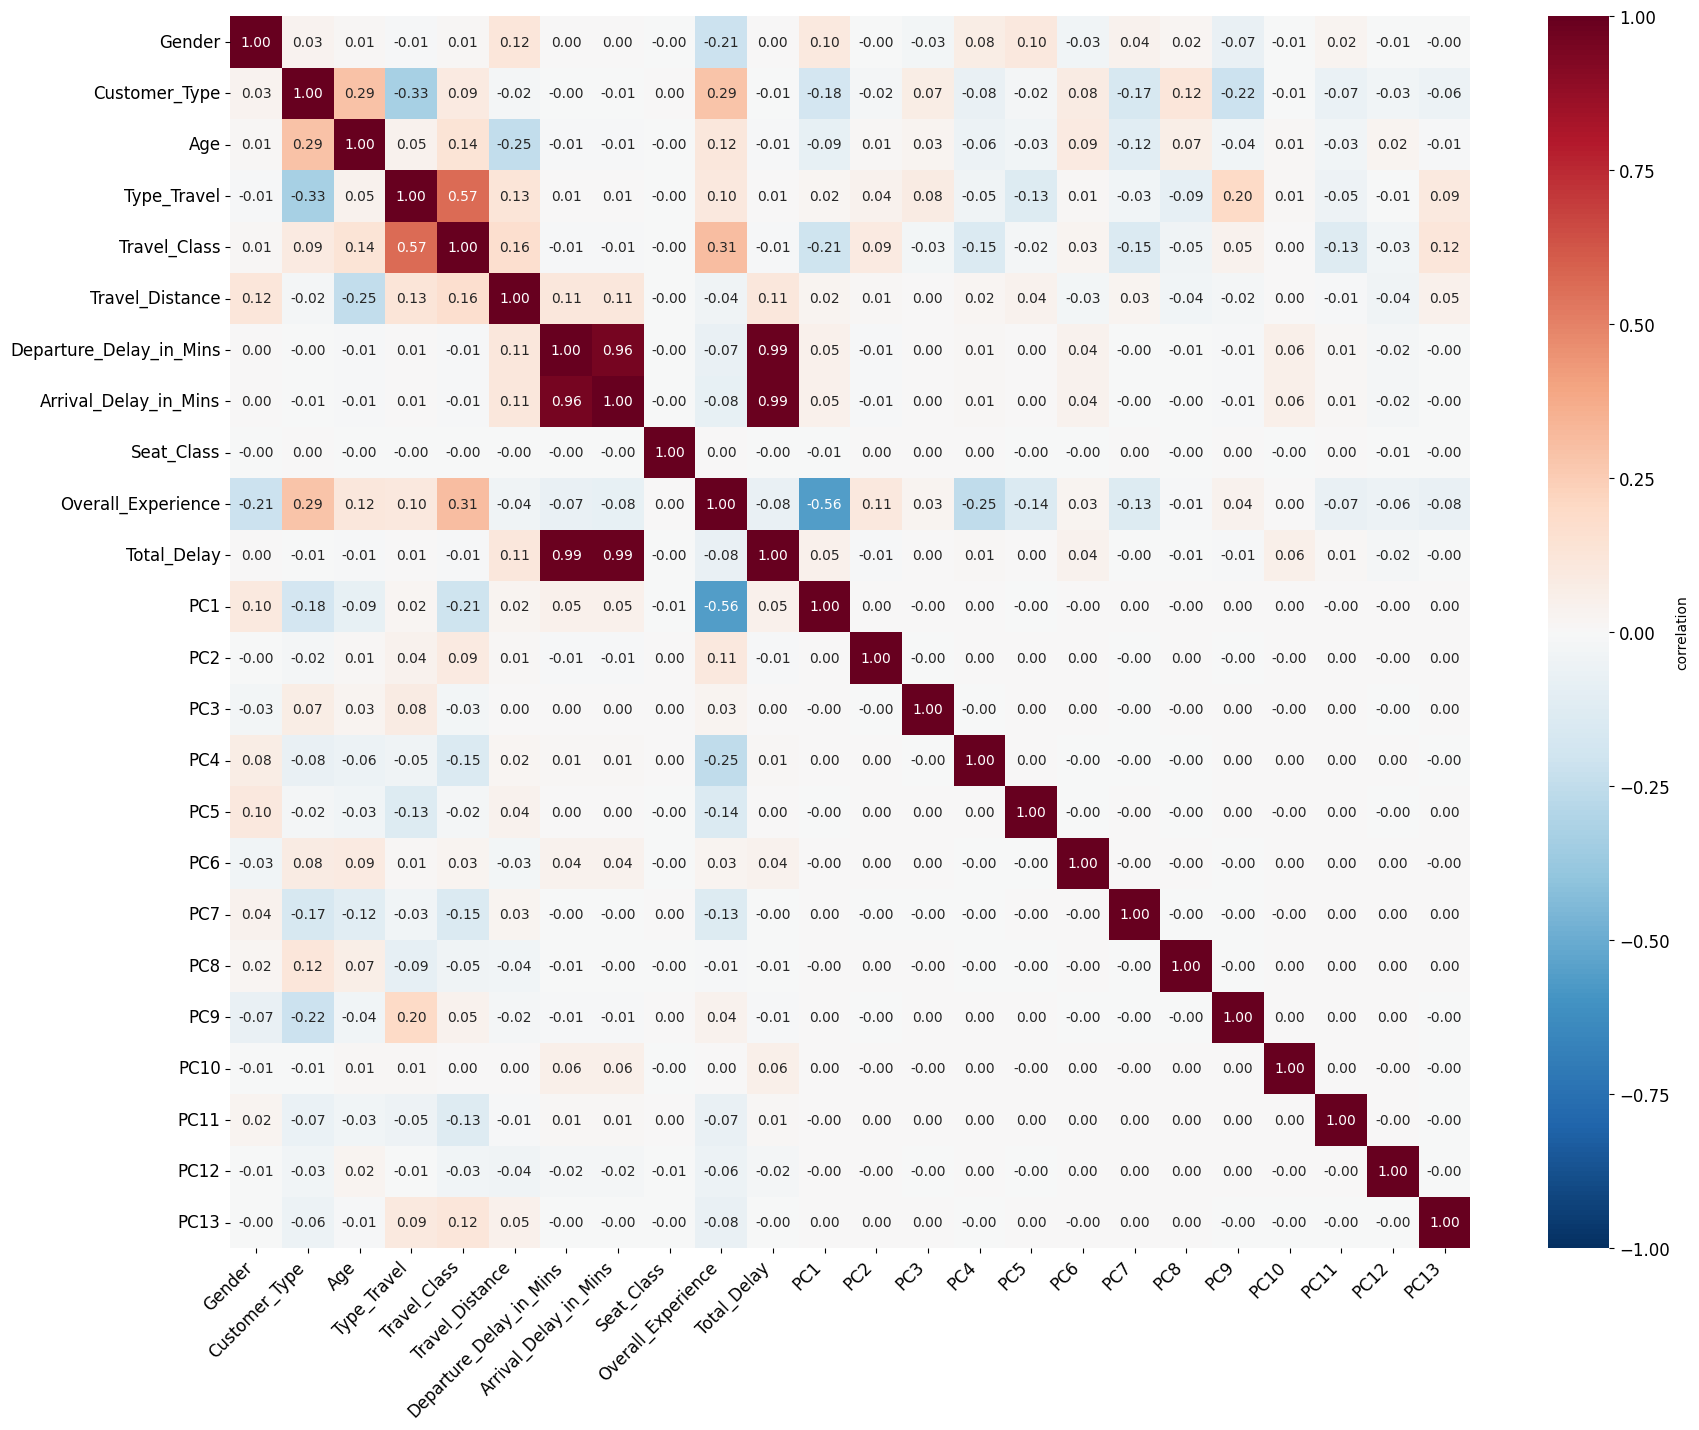

In [ ]:
# #Correlation for numerical_columns
# df_corr = df_with_pca_dropped.corr()

# # Plot correlations as a heatmap

# fig, ax = plt.subplots(figsize=(20, 16))
# sns.heatmap(df_corr, vmin=-1, vmax=1, cmap='RdBu_r',
#             xticklabels=True, yticklabels=True, annot=True, fmt='.2f',
#             annot_kws={'size': 10}, cbar_kws={'label': 'correlation'}, ax=ax)

# # Rotate the tick labels for better readability
# plt.xticks(rotation=45, ha='right', fontsize=12)
# plt.yticks(fontsize=12)

# # Adjust the font size of the color bar
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=12)

# plt.show()

In [ ]:
# df_backup3 = df.copy(deep=True)
# df = df_with_pca_dropped.copy(deep=True)

### **Prepare train set and test set**

In [ ]:
# Prepare Train set and test set
X_train = df[df['Overall_Experience'].notnull()].drop(columns=['Overall_Experience'])
y_train = df[df['Overall_Experience'].notnull()][['Overall_Experience']]
X_test = df[df['Overall_Experience'].isnull()].drop(columns=['Overall_Experience'])
y_test = df[df['Overall_Experience'].isnull()][['Overall_Experience']]

In [ ]:
# # Prepare Train set and test set
# X_train2 = df[df['Overall_Experience'].notnull()].drop(columns=['Overall_Experience'])
# y_train2 = df[df['Overall_Experience'].notnull()][['Overall_Experience']]
# X_test2 = df[df['Overall_Experience'].isnull()].drop(columns=['Overall_Experience'])
# y_test2 = df[df['Overall_Experience'].isnull()][['Overall_Experience']]

In [ ]:
y_train = y_train.astype('int')

In [ ]:
# y_train2 = y_train2.astype('int')

In [ ]:
import glob
import os
import re


# Define a output directory in Google Drive
output_dir = '/content/drive/My Drive/ColabOutputs'
os.makedirs(output_dir, exist_ok=True)

# Define the directory containing the selected CSV files
directory = '/content/drive/My Drive/ColabOutputs/pred'

In [ ]:
y_train.value_counts(normalize=True)

Overall_Experience
1                     0.546658
0                     0.453342
Name: proportion, dtype: float64

In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94379 entries, 98800001 to 98894379
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Overall_Experience  94379 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [ ]:
y_train

,Overall_Experience
ID,
98800001,0
98800002,0
98800003,1
98800004,0
98800005,1
...,...
98894375,0
98894376,1
98894377,1


## Building various models

In [ ]:
# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


## Decision Tree
  

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.453, 1: 0.547}, random_state = 1)

In [ ]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.453, 1: 0.547}, random_state=1)

**Let's check the model performance of decision tree**

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

dt_accuracy = accuracy_score(y_train, y_train_pred_dt)
print(f"Decision Tree Test Accuracy: {dt_accuracy:.3f}")


Decision Tree Test Accuracy: 1.000


**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

In [ ]:
# Checking performance on the test dataset
predictions = dt.predict(X_test)

y_test_pred_dt = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])

In [ ]:
filename = f"{output_dir}/Submission_dt.csv"
y_test_pred_dt.to_csv(filename, index=True)

# Submitted to Hackathon and Returned Accuracy rate as 0.9309028

**Let's plot the feature importance and check the most important features.**

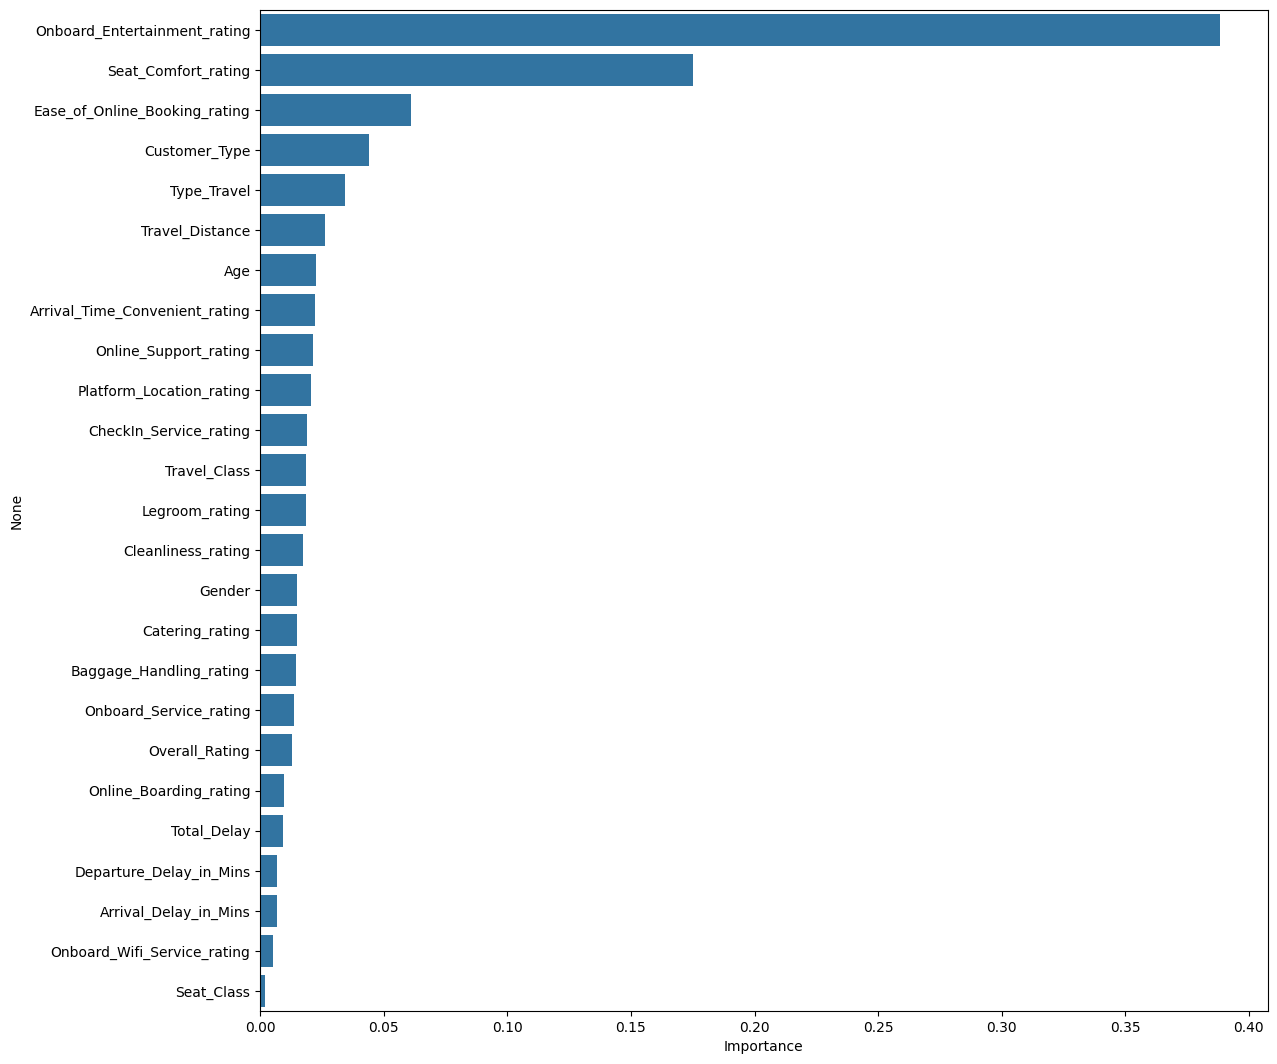

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

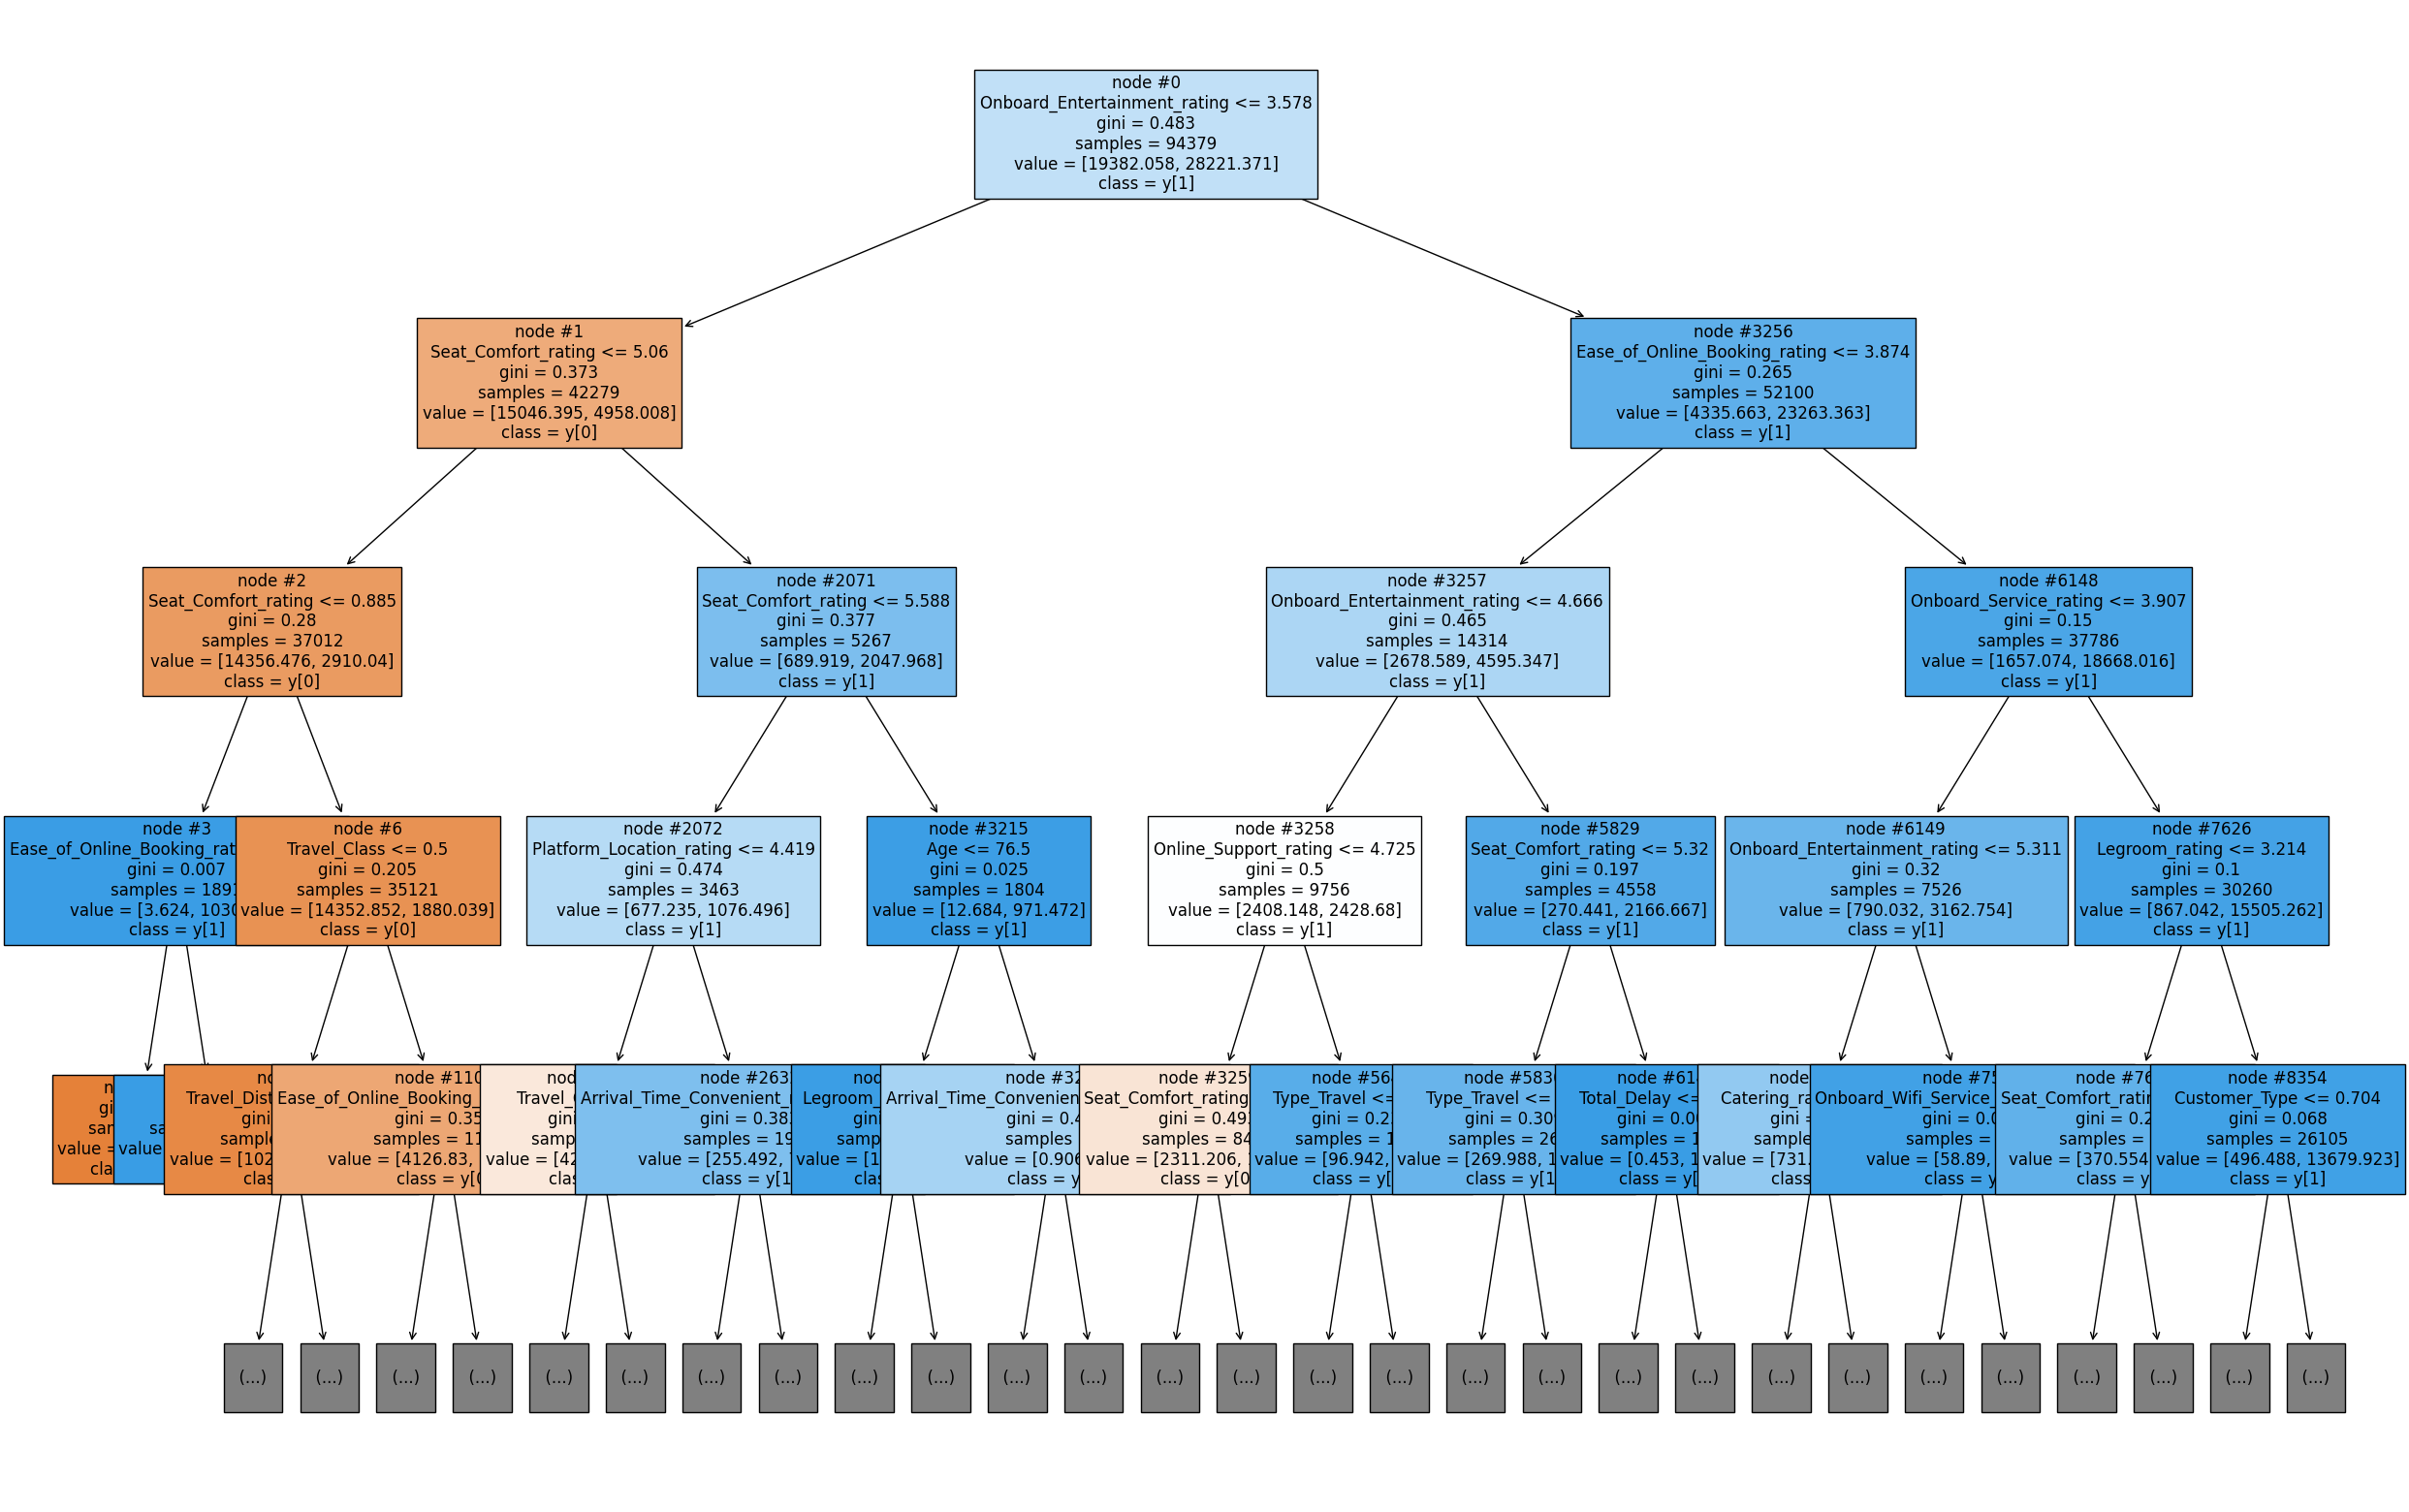

In [ ]:
features = list(X_train.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### **Building the Random Forest Classifier**

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.453, 1: 0.547}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.453, 1: 0.547}, random_state=1)

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

rf_accuracy = accuracy_score(y_train, y_pred_train_rf)
print(f"Decision Tree Test Accuracy: {rf_accuracy:.3f}")

Decision Tree Test Accuracy: 1.000


**Observation:**

- The Random Forest is giving a **100% score for all metrics on the training dataset.**

In [ ]:
# Checking performance on the test dataset
predictions = rf_estimator.predict(X_test)

y_test_pred_rf = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])

In [ ]:
filename = f"{output_dir}/Submission_rf.csv"
y_test_pred_rf.to_csv(filename, index=True)

#0.9511544

**Let's check the feature importance of the Random Forest**

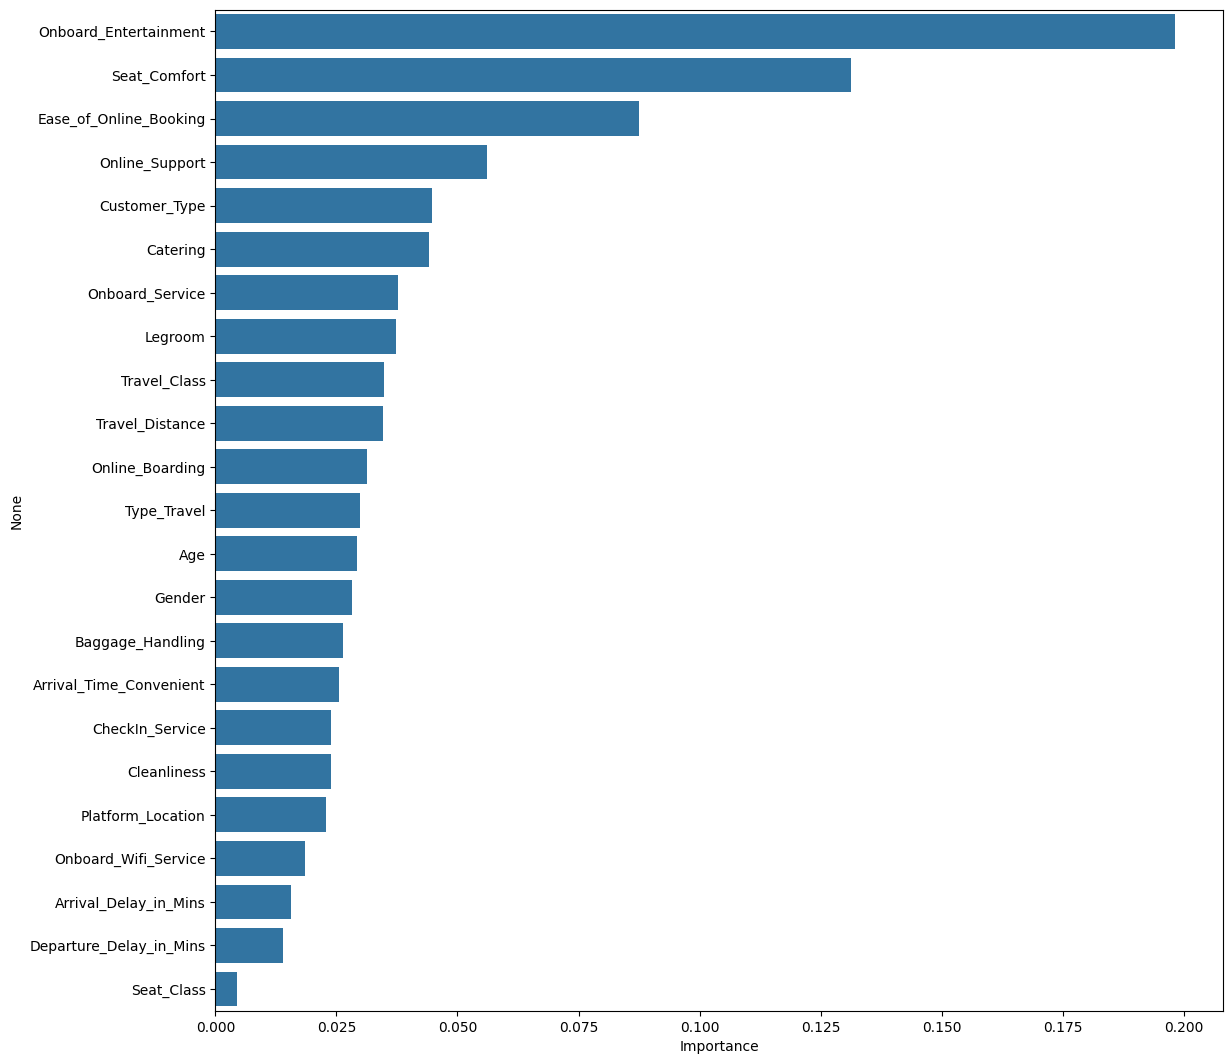

In [ ]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y=importance_df.index);

### **Tuning the Random Forest classifier**

**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node.

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.453, 1: 0.547}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = 'accuracy', cv = 5, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.453, 1: 0.547}, max_features=0.7,
                       n_estimators=500, random_state=1)

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

rf_tuned_accuracy = accuracy_score(y_train, y_pred_train_rf_tuned)
print(f"Decision Tree Test Accuracy: {rf_tuned_accuracy:.3f}")

Decision Tree Test Accuracy: 1.000


In [ ]:
# Checking performance on the test dataset
predictions = rf_estimator_tuned.predict(X_test)

y_pred_test_rf_tuned = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])

In [ ]:
filename = f"{output_dir}/Submission_rf_tuned.csv"
y_pred_test_rf_tuned.to_csv(filename, index=True)

#0.9533453

### **XGBoost**
- XGBoost stands for Extreme Gradient Boosting.
- XGBoost is a tree-based ensemble machine learning technique that improves prediction power and performance by improvising on the Gradient Boosting framework and incorporating reliable approximation algorithms. It is widely utilized and routinely appears at the top of competition leader boards in data science.

In [ ]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [ ]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [ ]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(X_train, y_train)



AdaBoostClassifier(random_state=1)

In [ ]:
# Checking performance on the test dataset
predictions = adaboost_model.predict(X_test)

y_test_pred_ada = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])



In [ ]:
filename = f"{output_dir}/Submission_ada.csv"
y_test_pred_ada.to_csv(filename, index=True)

In [ ]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(X_train, y_train)



GradientBoostingClassifier(random_state=1)

In [ ]:
# Checking performance on the test dataset
predictions = gbc.predict(X_test)

y_test_pred_gbc = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])

In [ ]:
filename = f"{output_dir}/Submission_gbc.csv"
y_test_pred_gbc.to_csv(filename, index=True)

In [ ]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_train,y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Checking performance on the test dataset
predictions = xgb.predict(X_test)

y_test_pred_xgb = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])

#0.9534858

In [ ]:
filename = f"{output_dir}/Submission_xgb.csv"
y_test_pred_xgb.to_csv(filename, index=True)

### **Hyperparameter Tuning**

In [ ]:
# Define the model
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Define the model with GPU support
xgb_gpu = XGBClassifier(
    random_state=1,
    eval_metric='logloss',
    tree_method='gpu_hist'
)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 2, 5],
    'booster': ['gbtree', 'gblinear']
}

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)

# Define the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_tuned, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the final model using the best parameters
best_params = grid_search.best_params_
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss', tree_method='gpu_hist', **best_params)
xgb_tuned.fit(X_train, y_train)

In [ ]:
# Checking performance on the test dataset
predictions = xgb_tuned.predict(X_test)

y_test_pred_xgb_tuned = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])



In [ ]:
filename = f"{output_dir}/Submission_xgb_tuned.csv"
y_test_pred_xgb_tuned.to_csv(filename, index=True)

In [ ]:
# Define the model
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'loss': ['deviance', 'exponential']  # Adding loss to the grid
}

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define the GridSearchCV
grid_search = GridSearchCV(estimator=gbc_tuned, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the final model using the best parameters
best_params = grid_search.best_params_
gbc_tuned = GradientBoostingClassifier(random_state=1, **best_params)
gbc_tuned.fit(X_train, y_train)



In [ ]:
# Checking performance on the test dataset
predictions = gbc_tuned.predict(X_test)

y_test_pred_gbc_tuned = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])

In [ ]:
filename = f"{output_dir}/Submission_gbc_tuned.csv"
y_test_pred_gbc_tuned.to_csv(filename, index=True)

In [ ]:
# Define the model
adaboost_tuned = AdaBoostClassifier(random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)]
}

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define the GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_tuned, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the final model using the best parameters
best_params = grid_search.best_params_
adaboost_tuned = AdaBoostClassifier(random_state=1, **best_params)
adaboost_tuned.fit(X_train, y_train)

In [ ]:
# Checking performance on the test dataset
predictions = adaboost_tuned.predict(X_test)

y_test_pred_ada_tuned = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])

In [ ]:
filename = f"{output_dir}/Submission_ada_tuned.csv"
y_test_pred_ada_tuned.to_csv(filename, index=True)

### **Other classifiers**

In [ ]:
!pip install hyperopt

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 8.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, KBinsDiscretizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from hyperopt import fmin, tpe, hp, Trials
from sklearn.feature_selection import RFE

In [ ]:
params = {
    'bagging_temperature': 0.5,
    'border_count': 50,
    'depth': 6,
    'iterations': 300,
    'l2_leaf_reg': 1,
    'learning_rate': 0.1,
    'random_strength': 2
}


In [ ]:
classifiers = [
     ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(class_weight={0: 0.453, 1: 0.547},
                       n_estimators=100)),
    ('Support Vector Machine', SVC(kernel='linear', C=1)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Bernoulli Naive Bayes', BernoulliNB()),
    ('MLP Classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)),
    ('Stochastic Gradient Descent', SGDClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(eval_metric='mlogloss', random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(verbose=0, random_state=42)),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ridge', RidgeClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=42))

]

# Iterate through the classifiers, fit, and generate predition on test set
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    y_test_pred = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])
    filename = f"{output_dir}/Sub_{name}.csv"
    y_test_pred.to_csv(filename, index=True)

### Hybrid Model - Majority Voting

In [ ]:
hybrid_train_df = pd.DataFrame()
hybrid_test_df = pd.DataFrame()

In [ ]:
for name, clf in classifiers:
    predictions = clf.predict(X_train)
    y_train_pred = pd.DataFrame(predictions, index=X_train.index, columns=[f"Overall_Experience_1_{name}"])
    # Concatenate this frame to the combined_df
    if hybrid_train_df.empty:
        hybrid_train_df = y_train_pred  # If empty, initialize it with the first df
    else:
        hybrid_train_df = pd.concat([hybrid_train_df, y_train_pred], axis=1)

    predictions = clf.predict(X_test)
    y_test_pred = pd.DataFrame(predictions, index=X_test.index, columns=[f"Overall_Experience_1_{name}"])
    # Concatenate this frame to the combined_df
    if hybrid_test_df.empty:
        hybrid_test_df = y_test_pred  # If empty, initialize it with the first df
    else:
        hybrid_test_df = pd.concat([hybrid_test_df, y_test_pred], axis=1)





In [ ]:
hybrid_test_df['Hybrid_Prediction'] = hybrid_test_df.mode(axis=1)[0].astype(int)

In [ ]:
hybrid_test_df['Hybrid_Prediction']

ID
99900001    1
99900002    1
99900003    1
99900004    0
99900005    1
           ..
99935598    0
99935599    1
99935600    0
99935601    1
99935602    0
Name: Hybrid_Prediction, Length: 35602, dtype: int64

In [ ]:
y_test_pred = pd.DataFrame(hybrid_test_df['Hybrid_Prediction'], index=hybrid_test_df.index, columns=['Overall_Experience'])
filename = f"{output_dir}/Sub_majorhybrid.csv"
y_test_pred.to_csv(filename, index=True)

### Other Algorithms

In [ ]:
# Importing libraries for building linear regression model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA


In [ ]:
X_train_h = hybrid_train_df.copy(deep=True)
y_train_h = y_train.copy(deep=True)
X_test_h = hybrid_test_df.copy(deep=True)

# Standardize the features
scaler = StandardScaler()
X_train_h_scaled = scaler.fit_transform(X_train_h)
X_test_h_scaled = scaler.transform(X_test_h)

# Handle correlation with PCA
pca = PCA(n_components=4)
X_train_h_pca = pca.fit_transform(X_train_h_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))
X_test_h_pca = pca.transform(X_test_h_scaled)

In [ ]:
y_test_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35602 entries, 99900001 to 99935602
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Overall_Experience  35602 non-null  int64
dtypes: int64(1)
memory usage: 556.3 KB


In [ ]:
# Train a linear regression model using the PCA components
lr = LinearRegression()
lr.fit(X_train_h, y_train_h)
predictions = lr.predict(X_test_h)
print(predictions)
binary_predictions = (predictions >= 0.5).astype(int)
print(binary_predictions)
y_test_pred = pd.DataFrame(binary_predictions, index=X_test_h.index, columns=['Overall_Experience'])
filename = f"{output_dir}/Sub_lr_hybrid3.csv"
y_test_pred.to_csv(filename, index=True)

[[ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 ...
 [-1.31720389e-15]
 [ 1.00000000e+00]
 [-1.55431223e-15]]
[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]


In [ ]:
classifiers = [
     ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Support Vector Machine', SVC(kernel='linear', C=1)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Bernoulli Naive Bayes', BernoulliNB()),
    ('MLP Classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)),
    ('Stochastic Gradient Descent', SGDClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(eval_metric='mlogloss', random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(verbose=0, random_state=42)),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ridge', RidgeClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=42))

]

# Iterate through the classifiers
for name, clf in classifiers:
    clf.fit(X_train_h, y_train)

    # predictions = clf.predict(X_test_h)
    # binary_predictions = (predictions >= 0.5).astype(int)

    # Handle probability outputs if applicable
    if hasattr(clf, "predict_proba"):
        predictions = clf.predict_proba(X_test_h)[:, 1]
        binary_predictions = (predictions >= 0.5).astype(int)
    else:
        binary_predictions = clf.predict(X_test_h)

    y_test_pred = pd.DataFrame(binary_predictions, index=X_test_h.index, columns=['Overall_Experience'])
    filename = f"{output_dir}/Sub_10_h4_{name}.csv"
    y_test_pred.to_csv(filename, index=True)

### Feature selection

In [ ]:
# Get the feature importances
feature_importances = clf.feature_importances_

# Print the feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f'Feature: {feature}, Importance: {importance}')

Feature: Gender, Importance: 4.441808149995513
Feature: Customer_Type, Importance: 5.451621066893669
Feature: Age, Importance: 2.7322558225158913
Feature: Type_Travel, Importance: 9.349742888189104
Feature: Travel_Class, Importance: 3.4612473043097216
Feature: Travel_Distance, Importance: 1.804400365654966
Feature: Departure_Delay_in_Mins, Importance: 0.36565887118722695
Feature: Arrival_Delay_in_Mins, Importance: 0.7229686020660201
Feature: Seat_Comfort, Importance: 28.3219667373763
Feature: Seat_Class, Importance: 0.09126256605310974
Feature: Arrival_Time_Convenient, Importance: 3.153658073618476
Feature: Catering, Importance: 2.043938780396261
Feature: Platform_Location, Importance: 5.292134825000217
Feature: Onboard_Wifi_Service, Importance: 0.8593764185247169
Feature: Onboard_Entertainment, Importance: 9.016315039052662
Feature: Online_Support, Importance: 2.5835348403049014
Feature: Ease_of_Online_Booking, Importance: 4.429000394171077
Feature: Onboard_Service, Importance: 1.8280

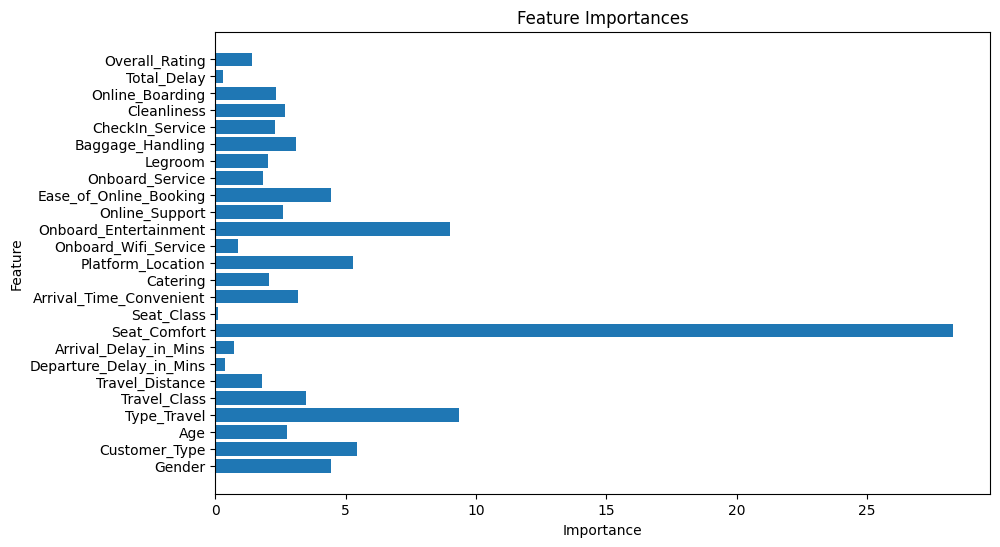

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
X_train_sel = X_train.drop(['Total_Delay', 'Seat_Class', 'Departure_Delay_in_Mins'], axis=1)
X_test_sel = X_test.drop(['Total_Delay', 'Seat_Class', 'Departure_Delay_in_Mins'], axis=1)

In [ ]:
X_train_sel = X_train.drop(['Total_Delay'], axis=1)
X_test_sel = X_test.drop(['Total_Delay'], axis=1)

In [ ]:
selected_features_model = CatBoostClassifier(verbose=0, random_state=42)
selected_features_model.fit(X_train_sel, y_train)
predictions = selected_features_model.predict(X_test_sel)
y_test_pred = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])
filename = f"{output_dir}/Sub_9_cat_sel.csv"
y_test_pred.to_csv(filename, index=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94379 entries, 98800001 to 98894379
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94379 non-null  float64
 1   Customer_Type            94379 non-null  float64
 2   Age                      94379 non-null  float64
 3   Type_Travel              94379 non-null  float64
 4   Travel_Class             94379 non-null  float64
 5   Travel_Distance          94379 non-null  float64
 6   Departure_Delay_in_Mins  94379 non-null  float64
 7   Arrival_Delay_in_Mins    94379 non-null  float64
 8   Seat_Comfort             94379 non-null  float64
 9   Seat_Class               94379 non-null  float64
 10  Arrival_Time_Convenient  94379 non-null  float64
 11  Catering                 94379 non-null  float64
 12  Platform_Location        94379 non-null  float64
 13  Onboard_Wifi_Service     94379 non-null  float64
 14  Onboard_Entertain

In [ ]:
# Get the model's parameters after fitting
params = clf.get_params()

# Print the parameters
for param, value in params.items():
    print(f'{param}: {value}')

verbose: 0
random_state: 42


In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=e511ab2a730d16a20ce47c9bda34cf319d41d7317d82b8f70e024114bca2f468
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
# Check for negative values in the dataset
negative_values = (X_train < 0).any()
print("Features containing negative values:")
print(negative_values[negative_values])

Features containing negative values:
Customer_Type    True
Type_Travel      True
dtype: bool


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2


# Apply Chi-Squared test
k = 3  # Number of top features to select
chi2_selector = SelectKBest(chi2, k=k)
X_train_kbest = chi2_selector.fit_transform(X_train, y_train)
X_test_kbest = chi2_selector.transform(X_test)

# Train a model using the selected features
selected_features_model = CatBoostClassifier(verbose=0, random_state=42)
selected_features_model.fit(X_train_kbest, y_train)
predictions = selected_features_model.predict(X_test_kbest)
y_test_pred = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])
filename = f"{output_dir}/Sub_9_cat_chi.csv"
y_test_pred.to_csv(filename, index=True)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# Compute permutation importance using the validation set
perm = PermutationImportance(clf, random_state=42).fit(X_train, y_train)

# Display permutation importance
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

Weight,Feature
0.2023 ± 0.0007,Seat_Comfort
0.0274 ± 0.0007,Onboard_Entertainment
0.0248 ± 0.0010,Platform_Location
0.0247 ± 0.0007,Type_Travel
0.0228 ± 0.0007,Customer_Type
0.0193 ± 0.0009,Cleanliness
0.0179 ± 0.0007,Baggage_Handling
0.0159 ± 0.0006,Gender
0.0121 ± 0.0004,CheckIn_Service
0.0121 ± 0.0005,Online_Support


In [ ]:
feature_names = X_train.columns.tolist()
# Select important features
threshold = 0.01  # Define a threshold for feature importance
important_features = [feature for feature, importance in zip(feature_names, perm.feature_importances_) if importance > threshold]
print(f"Important features: {important_features}")

# Retrain model with important features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]
clf.fit(X_train_important, y_train)

# Evaluate new model
predictions = clf.predict(X_test_important)
y_test_pred = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])
filename = f"{output_dir}/Sub_9_Cat_PerImportant.csv"
y_test_pred.to_csv(filename, index=True)

Important features: ['Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Seat_Comfort', 'Platform_Location', 'Onboard_Entertainment', 'Online_Support', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness']


In [ ]:
import os
# Define the output directory in Google Drive
output_dir = '/content/drive/My Drive/ColabOutputs'
os.makedirs(output_dir, exist_ok=True)

# Define the model
cat_model = CatBoostClassifier(verbose=0, random_state=42, task_type='GPU', devices='0')

# Define RFE
rfe = RFE(estimator=cat_model, n_features_to_select=20)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Transform the training and testing sets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the model on the selected features
cat_model.fit(X_train_rfe, y_train)

# Make predictions on the testing set
predictions = cat_model.predict(X_test_rfe)
y_test_pred = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])
filename = f"{output_dir}/Sub_8_CatBoost_RFE_GPU.csv"
y_test_pred.to_csv(filename, index=True)

###  Hyperparameter tuning

Try different approachs to speed up the hyperparameter tuning process, making it more efficient to find the best model configuration.


*   GPU support
*   Early stopping
*   RandomizedSearchCV
*   Dask's parallelized RandomizedSearchCV




In [ ]:
!pip install dask-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 18.6 MB/s eta 0:00:00


In [ ]:
import os
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from dask_ml.model_selection import RandomizedSearchCV as DaskRandomizedSearchCV
import dask.dataframe as dd

# Define the output directory in Google Drive
output_dir = '/content/drive/My Drive/ColabOutputs'
os.makedirs(output_dir, exist_ok=True)

# Convert pandas DataFrame to Dask DataFrame
X_train_dask = dd.from_pandas(X_train, npartitions=2)
y_train_dask = dd.from_pandas(y_train, npartitions=2)

# Define the CatBoost model
catboost_model = CatBoostClassifier(verbose=0, random_state=42, task_type='GPU', devices='0', early_stopping_rounds=10)

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 5, 6, 7],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 50, 100],
    'bagging_temperature': [0.5, 1, 1.5],
    'random_strength': [1, 2, 3]
}

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# Define the DaskRandomizedSearchCV
random_search = DaskRandomizedSearchCV(estimator=catboost_model, param_distributions=param_grid, scoring='accuracy', cv=cv, n_jobs=1, n_iter=50, random_state=1)

# Fit the RandomizedSearchCV
random_search.fit(X_train_dask, y_train_dask)

# Output the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Train the final model using the best parameters
best_params = random_search.best_params_
catboost_model = CatBoostClassifier(verbose=0, random_state=42, task_type='GPU', devices='0', early_stopping_rounds=10, **best_params)
catboost_model.fit(X_train, y_train)

# Predict for X_test
predictions = catboost_model.predict(X_test)
y_test_pred = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])
filename = f"{output_dir}/Sub_9_CatBoost_Tuned_GPU.csv"
y_test_pred.to_csv(filename, index=True)

In [ ]:
import os
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from catboost import CatBoostClassifier

# Define the output directory in Google Drive
output_dir = '/content/drive/My Drive/ColabOutputs'
os.makedirs(output_dir, exist_ok=True)

# Define the CatBoost model
catboost_model = CatBoostClassifier(verbose=0, random_state=42, task_type='GPU', devices='0', early_stopping_rounds=10)

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 5, 6, 7],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 50, 100],
    'bagging_temperature': [0.5, 1, 1.5],
    'random_strength': [1, 2, 3]
}

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)

# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=catboost_model, param_distributions=param_grid, scoring='accuracy', cv=cv, n_jobs=1, n_iter=50, random_state=1)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Train the final model using the best parameters
best_params = random_search.best_params_
catboost_model = CatBoostClassifier(verbose=0, random_state=42, task_type='GPU', devices='0', early_stopping_rounds=10, **best_params)
catboost_model.fit(X_train, y_train)

# Predict for X_test
predictions = catboost_model.predict(X_test)
y_test_pred = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])
filename = f"{output_dir}/Sub_9_CatBoost_Tuned_GPU.csv"
y_test_pred.to_csv(filename, index=True)

Best Parameters: {'random_strength': 1, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 7, 'border_count': 50, 'bagging_temperature': 0.5}
Best Score: 0.9558482430850216


In [ ]:
# Define the CatBoost model
catboost_model = CatBoostClassifier(verbose=0, random_state=42, task_type='GPU', devices='0', early_stopping_rounds=10)

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 4, 5, 6],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 50, 100],
    'bagging_temperature': [0.5, 1, 2],
    'random_strength': [1, 2, 3]
}

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define the GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the final model using the best parameters
best_params = grid_search.best_params_
catboost_model = CatBoostClassifier(verbose=0, random_state=42, task_type='GPU', devices='0', early_stopping_rounds=10, **best_params)
catboost_model.fit(X_train, y_train)

# Predict for X_test
predictions = catboost_model.predict(X_test)
y_test_pred = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])
filename = f"{output_dir}/Sub_9_CatBoost_Tuned_GPU.csv"
y_test_pred.to_csv(filename, index=True)

### Hybrid Model - accuracy extraction

The submission files have been renamed with their accuracy rate returned by Hackathon. Extract the accuracy for later use.  

In [ ]:
# # Read the CSV file into a DataFrame
# df_1 = pd.read_csv('/content/drive/MyDrive/ColabOutputs/Sub_9_CatBoost_time_non_immute(0.9564912).csv')
# df_2 = pd.read_csv('/content/drive/MyDrive/ColabOutputs/Sub_9_CatBoost_age_immuted(0.956435).csv')
# df_3 = pd.read_csv('/content/drive/MyDrive/ColabOutputs/Sub_6_XGBoost(0.9551991).csv')


# # Convert DataFrame columns to arrays
# pred1 = df_1['Overall_Experience'].values
# pred2 = df_2['Overall_Experience'].values
# #pred3 = df_3['Overall_Experience'].values

# # Sample data
# pred = [pred1, pred2, pred3]  # List of arrays with predictions
# accuracies = [0.9564912, 0.956435, 0.9551991]  # Corresponding accuracies of the predictions

# # Convert accuracies to weights
# weights = np.array(accuracies) / np.sum(accuracies)

# # Compute weighted average of predictions
# y_test_estimated = np.average(pred, axis=0, weights=weights)

# # round the estimated values
# predictions = np.round(y_test_estimated).astype(int)

# y_test_pred = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])
# filename = f"{output_dir}/Sub_9_hybrid.csv"
# y_test_pred.to_csv(filename, index=True)

In [ ]:
# import glob
# import os
# import re
# import numpy as np
# import pandas as pd

# # Define a directory in your Google Drive
# output_dir = '/content/drive/My Drive/ColabOutputs'
# os.makedirs(output_dir, exist_ok=True)

# # Define the directory containing the CSV files
# directory = '/content/drive/My Drive/ColabOutputs/pred'

# List all CSV files in the directory
#csv_files = glob.glob(os.path.join(directory, "Sub*.csv"))
csv_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
print(csv_files)

# Create a dictionary to store numpy arrays and a list for accuracies
arrays = {}
accuracies = []
dataframes = []

# Regular expression pattern to extract accuracy values from filenames
pattern = re.compile(r"Sub.*\(([\d.]+)\)\.csv")

# Read each CSV file into a DataFrame, then convert to numpy array, and store it in the dictionary
for i, file in enumerate(csv_files, start=1):
    # Extract accuracy value from the filename

    match = pattern.search(file)
    if match:
        accuracy = float(match.group(1))
        accuracies.append(accuracy)
        print(accuracy)
        # Read the CSV file into a DataFrame
        pred = pd.read_csv(file, usecols=["Overall_Experience"])
        # Convert the DataFrame to a numpy array
        arrays[f'df_{i}'] = pred["Overall_Experience"].values
        pred2 = pd.read_csv(file, usecols=["ID", "Overall_Experience"])
        pred2 = pred2.set_index("ID")

        dataframes.append(pred2.rename(columns={"Overall_Experience": f"Overall_Experience_{i}"}))

# Convert the dictionary to a list of arrays
array_list = list(arrays.values())

# Convert accuracies to a numpy array
accuracies = np.array(accuracies)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, axis=1)


# Display the loaded arrays and accuracies
for i, array in enumerate(array_list, start=1):
    print(f"Array {i}:")
    print(array[:5])  # Display the first few rows of each array

print(f"Accuracies: {accuracies}")

['/content/drive/My Drive/ColabOutputs/pred/Sub_9_CatBoost(0.9565755).csv', '/content/drive/My Drive/ColabOutputs/pred/Sub_6_XGBoost(0.9551991).csv', '/content/drive/My Drive/ColabOutputs/pred/Sub_10_majorhybrid(0.956744).csv', '/content/drive/My Drive/ColabOutputs/pred/Sub_10_h_Gaussian Naive Bayes(0.9572496).csv', '/content/drive/My Drive/ColabOutputs/pred/Sub_hybrid (0.9575305).csv']
0.9565755
0.9551991
0.956744
0.9572496
0.9575305
Array 1:
[1 1 1 0 1]
Array 2:
[1 1 1 0 1]
Array 3:
[1 1 1 0 1]
Array 4:
[1 1 1 0 1]
Array 5:
[1 1 1 0 1]
Accuracies: [0.9565755 0.9551991 0.956744  0.9572496 0.9575305]


In [ ]:
combined_df

,Overall_Experience_1,Overall_Experience_2,Overall_Experience_3,Overall_Experience_4
ID,,,,
99900001,1,1,1,1
99900002,1,1,1,1
99900003,1,1,1,1
99900004,0,0,0,0
99900005,1,1,1,1
...,...,...,...,...
99935598,0,0,0,0
99935599,1,1,1,1
99935600,0,1,0,1


### Agreement and Disagreement Analysis

Analyzing model agreement and disagreement can provide valuable insights into how different models behave and where they tend to make similar or divergent predictions. This analysis helps in understanding the strengths and weaknesses of each model, identifying patterns, and potentially improving the hybrid model.

In [ ]:
# Function to check if all values in a row are the same
def not_all_equal(row):
    return len(set(row)) > 1

# Select rows where any column value is not the same
df_filtered = combined_df[combined_df.apply(not_all_equal, axis=1)]

print(df_filtered)

          Overall_Experience_1  Overall_Experience_2  Overall_Experience_3  \
ID                                                                           
99900020                     1                     0                     0   
99900044                     1                     0                     1   
99900059                     0                     1                     1   
99900069                     0                     1                     1   
99900095                     1                     0                     0   
...                        ...                   ...                   ...   
99935506                     0                     1                     1   
99935558                     0                     1                     1   
99935565                     0                     0                     1   
99935582                     1                     0                     0   
99935600                     0                     1            

In [ ]:
hybrid_df = pd.read_csv("/content/drive/My Drive/ColabOutputs/pred/hybrid (9575305).csv", usecols=["ID", "Overall_Experience"])
hybrid_df = hybrid_df.set_index("ID")

In [ ]:
merged_df = pd.merge(hybrid_df, combined_df, on='ID', how='inner')

print(merged_df)

          Overall_Experience  Overall_Experience_1  Overall_Experience_2  \
ID                                                                         
99900001                   1                     1                     1   
99900002                   1                     1                     1   
99900003                   1                     1                     1   
99900004                   0                     0                     0   
99900005                   1                     1                     1   
...                      ...                   ...                   ...   
99935598                   0                     0                     0   
99935599                   1                     1                     1   
99935600                   1                     0                     1   
99935601                   1                     1                     1   
99935602                   0                     0                     0   

          O

In [ ]:
pd.set_option('display.max_columns',100)

In [ ]:
merged_df[merged_df['Overall_Experience_4']!=merged_df['Overall_Experience']]

,Overall_Experience,Overall_Experience_1,Overall_Experience_2,Overall_Experience_3,Overall_Experience_4
ID,,,,,
99900318,0,0,0,1,1
99900614,0,0,0,0,1
99900726,1,1,1,0,0
99901204,0,0,0,0,1
99901391,1,1,1,1,0
...,...,...,...,...,...
99934936,0,0,0,1,1
99935061,0,0,0,0,1
99935116,0,0,0,0,1


In [ ]:
df_filtered

,Overall_Experience_1,Overall_Experience_2,Overall_Experience_3,Overall_Experience_4
ID,,,,
99900020,1,0,0,0
99900044,1,0,1,1
99900059,0,1,1,0
99900069,0,1,1,1
99900095,1,0,0,0
...,...,...,...,...
99935506,0,1,1,1
99935558,0,1,1,1
99935565,0,0,1,0


In [ ]:
filtered_X_test = X_test[X_test.index.isin(df_filtered.index)]

In [ ]:
filtered_X_test

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Total_Delay,Overall_Rating
ID,,,,,,,,,,,,,,,,,,,,,,,,,
99900020,0.0,0.000000,25.0,1.000000,1.0,2383.0,41.0,30.0,5.0,0.0,6.000000,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,71.0,5.2
99900044,1.0,1.000000,58.0,0.893267,1.0,331.0,0.0,1.0,3.0,1.0,6.000000,2.0,4.0,2.0,5.0,2.0,5.0,5.0,2.0,4.0,6.0,5.0,2.0,1.0,4.1
99900059,1.0,0.843546,40.0,1.000000,1.0,1712.0,0.0,0.0,5.0,0.0,5.000000,5.0,3.0,6.0,5.0,2.0,6.0,4.0,4.0,5.0,4.0,5.0,6.0,0.0,5.1
99900069,0.0,1.000000,66.0,0.000000,0.0,1134.0,0.0,0.0,5.0,0.0,4.000000,5.0,4.0,5.0,5.0,6.0,4.0,4.0,5.0,4.0,6.0,4.0,3.0,0.0,4.9
99900095,0.0,1.000000,28.0,0.453897,0.0,1556.0,0.0,0.0,5.0,0.0,2.000000,2.0,2.0,5.0,5.0,5.0,5.0,3.0,2.0,4.0,2.0,5.0,5.0,0.0,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935506,1.0,1.000000,13.0,0.000000,0.0,1726.0,0.0,0.0,5.0,1.0,6.000000,5.0,4.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,2.0,5.0,0.0,4.6
99935558,0.0,1.000000,14.0,0.170746,0.0,950.0,76.0,74.0,5.0,1.0,5.000000,5.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,6.0,6.0,5.0,4.0,150.0,5.1
99935565,1.0,1.000000,45.0,1.000000,0.0,4058.0,0.0,19.0,5.0,0.0,3.556602,3.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,5.0,2.0,5.0,19.0,4.3


In [ ]:
filtered_df_test = df_test[df_test['ID'].isin(df_filtered.index)]

In [ ]:
filtered_df_test

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
19,99900020,Female,Disloyal Customer,25.0,Business Travel,Business,2383,41.0,30.0,Good,Ordinary,Excellent,Good,Manageable,Good,Good,Acceptable,Good,Good,Acceptable,Good,Good,Good,Good
43,99900044,Male,Loyal Customer,58.0,NaN,Business,331,0.0,1.0,Needs Improvement,Green Car,Excellent,Poor,Manageable,Poor,Good,Poor,Good,Good,Poor,Acceptable,Excellent,Good,Poor
58,99900059,Male,NaN,40.0,Business Travel,Business,1712,0.0,0.0,Good,Ordinary,Good,Good,Needs Improvement,Excellent,Good,Poor,Excellent,Acceptable,Acceptable,Good,Acceptable,Good,Excellent
68,99900069,Female,Loyal Customer,66.0,Personal Travel,Eco,1134,0.0,0.0,Good,Ordinary,Acceptable,Good,Manageable,Good,Good,Excellent,Acceptable,Acceptable,Good,Acceptable,Excellent,Acceptable,Needs Improvement
94,99900095,Female,Loyal Customer,28.0,NaN,Eco,1556,0.0,0.0,Good,Ordinary,Poor,Poor,Inconvenient,Good,Good,Good,Good,Needs Improvement,Poor,Acceptable,Poor,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35505,99935506,Male,Loyal Customer,13.0,Personal Travel,Eco,1726,0.0,0.0,Good,Green Car,Excellent,Good,Manageable,Good,Good,Good,Good,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Poor,Good
35557,99935558,Female,Loyal Customer,14.0,NaN,Eco,950,76.0,74.0,Good,Green Car,Good,Good,Convenient,Acceptable,Good,Acceptable,Acceptable,Acceptable,Good,Excellent,Excellent,Good,Acceptable
35564,99935565,Male,Loyal Customer,45.0,Business Travel,Eco,4058,0.0,19.0,Good,Ordinary,NaN,Needs Improvement,Needs Improvement,Good,Good,Good,Needs Improvement,Acceptable,Acceptable,Acceptable,Good,Poor,Good
35581,99935582,Female,Loyal Customer,67.0,Personal Travel,Eco,285,0.0,0.0,Good,Ordinary,Excellent,Extremely Poor,Manageable,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Extremely Poor,Needs Improvement,Excellent,Needs Improvement,Acceptable


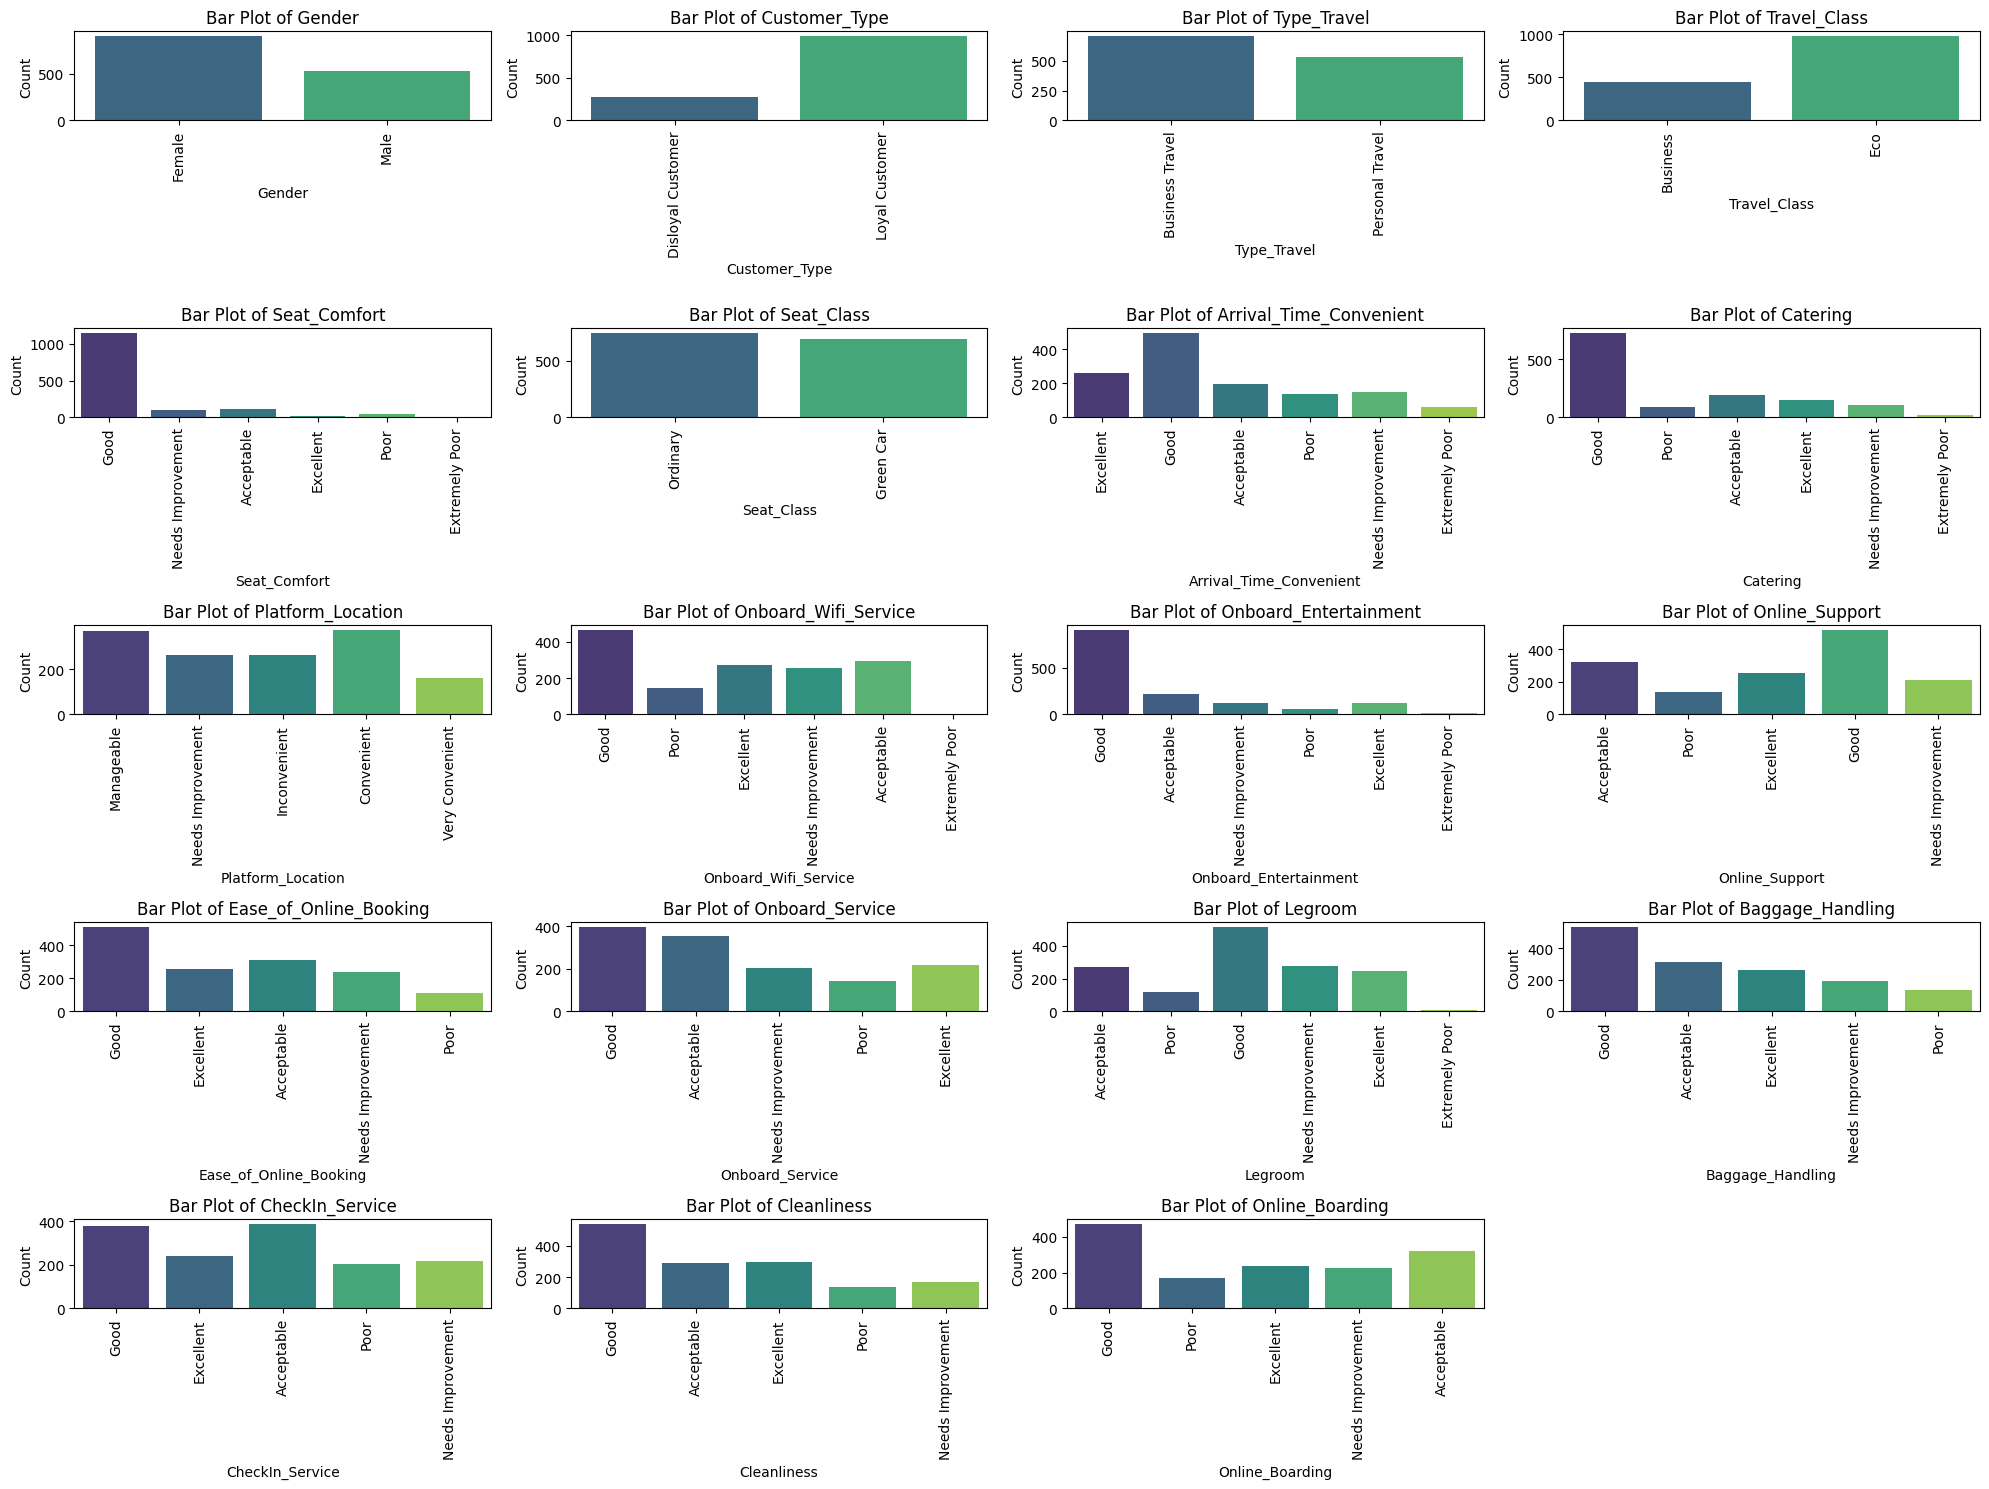

In [ ]:
# Number of columns to be plotted
num_of_cat_cols = len(cat_cols)

# Determine the number of rows and columns for the subplots
n_cols = 4  # Number of columns in the grid
n_rows = (num_of_cat_cols // n_cols) + (num_of_cat_cols % n_cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Loop through the categorical columns and create a bar plot for each
for i, col in enumerate(cat_cols):
    sns.countplot(data=filtered_df_test, x=col, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Bar Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



### Hybrid Model - Majority and Weighted Voting

* Majority Voting
* Use the accuracy as weight to do voting

In [ ]:
# Convert accuracies to weights
weights = np.array(accuracies) / np.sum(accuracies)

# Compute weighted average of predictions
y_test_estimated = np.average(array_list, axis=0, weights=weights)

# round the estimated values
predictions = np.round(y_test_estimated).astype(int)

# Compute majority voting
majority_predictions = pd.DataFrame(array_list).mode(axis=0).iloc[0].astype(int).values

y_test_pred = pd.DataFrame(predictions, index=X_test.index, columns=['Overall_Experience'])
filename = f"{output_dir}/Sub_10_hybrid_w.csv"
y_test_pred.to_csv(filename, index=True)

y_test_pred = pd.DataFrame(majority_predictions, index=X_test.index, columns=['Overall_Experience'])
filename = f"{output_dir}/Sub_10_hybrid_m.csv"
y_test_pred.to_csv(filename, index=True)